# EE4C12-Epileptic-Seizure-Detection-using-EEG


    
Group 16 Members:

    1. Zhixuan Ge  
    2. Yanqi Hong 

## 1. Program Preparation

### 1.1 Import Packages

In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import random

# from sklearn.utils.validation import check_missing_values
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
# from sklearn.datasets import make_classification
# from collections import Counter

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
device = "cuda"
#device = "cpu"

In [6]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

### 1.2 Import Data

In [7]:
#load data on Yanqi Hong's computer
data = pd.read_csv('E:\DATA\TUD\Master\TUD_Master_Y1\Q1\EE4C12 Machine Learning For Electrical Engineering\CodeLab\Project\S&S_SZD (1)\Data\Project_Data_EE4C12_S&S_SZD.csv')
data

Patient  annotation  min|FP1-F7  min|F7-T3  min|T3-T5  min|T5-O1  \
0          258           1          50         61         57         53   
1          258           1          48         62         60         46   
2          258           1          51         60         59         45   
3          258           1          49         58         56         42   
4          258           1          45         57         61         41   
...        ...         ...         ...        ...        ...        ...   
55451    11580          -1          75         73         81         80   
55452    11580          -1          74         74         77         71   
55453    11580          -1          72         76         72         73   
55454    11580          -1          77         82         74         75   
55455    11580          -1          71         79         74         78   

       min|FP2-F8  min|F8-T4  min|T4-T6  min|T6-O2  ...  norm_power_HF|CZ-C4  \
0              39         35         39         35  ...             0.016087   
1              38         35         39         33  ...             0.024006   
2              38         36         40         36  ...             0.037326   
3              36         36         41         37  ...             0.027546   
4              35         37         41         37  ...             0.036820   
...           ...        ...        ...        ...  ...                  ...   
55451          66         80         77         75  ...             0.244334   
55452          79         75         82         77  ...             0.588236   
55453          74         76         80         76  ...             0.296041   
55454          82         85         80         76  ...             0.440360   
55455          80         85         81         75  ...             1.019325   

       norm_power_HF|C4-T4  norm_power_HF|FP1-F3  norm_power_HF|F3-C3  \
0                 0.066920              0.102402             0.481384   
1                 0.064857              0.031791             0.225788   
2                 0.100177              0.050009             0.622584   
3                 0.107883              0.014017             0.359140   
4                 0.182520              0.031397             0.328354   
...                    ...                   ...                  ...   
55451             0.625396              0.023821             0.058277   
55452             0.743060              0.076294             0.332341   
55453             0.770194              0.041190             0.090919   
55454             0.720855              0.026959             0.026340   
55455             0.735140              0.030715             0.077191   

       norm_power_HF|C3-P3  norm_power_HF|P3-O1  norm_power_HF|FP2-F4  \
0                 0.690787             0.154544              0.062533   
1                 0.409987             0.184671              0.071133   
2                 0.394504             0.225516              0.050673   
3                 0.276964             0.104977              0.018042   
4                 0.156929             0.151952              0.047532   
...                    ...                  ...                   ...   
55451             0.083594             0.114426              0.119654   
55452             0.228458             0.170603              0.351418   
55453             0.186074             0.216797              0.231053   
55454             0.077674             0.269610              0.186769   
55455             0.095298             0.317765              0.271859   

       norm_power_HF|F4-C4  norm_power_HF|C4-P4  norm_power_HF|P4-O2  
0                 0.046460             0.066575             0.086999  
1                 0.022369             0.079494             0.047536  
2                 0.044906             0.102142             0.068105  
3                 0.079467             0.078255             0.089385  
4                 0.135071          

In [29]:
# # load data on Zhixuan's computer
# data = pd.read_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\S&S_SZD\Project_Data_EE4C12_S&S_SZD.csv')
# data

## 2. Data Preprocessing

### 2.1 Train-Test Split

In [8]:
# Not applied for the moment
# x is the features, y is the label
y = np.int32(data['annotation'].values)
X = data.iloc[:, 2:].values



#split the data into training and testing
Shuffle_state = 42
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=Shuffle_state)

print(X_train.shape)
print(X_test.shape)

#pca
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(X_train)
# X_train =pca.transform(X_train)
# X_test =pca.transform(X_test)
# print(X_train.shape)
# print(X_test.shape)

#k fold cross validation

(41592, 360)
(13864, 360)


In [10]:
#k fold cross validation
def Kfold_split(X_train, y_train, Shuffle_state):   # Split the data into training and validation sets
    #example : X_k_train, y_k_train, X_k_val, y_k_val = Kfold_split(X_train, y_train, Shuffle_state)
    kf = KFold(n_splits=5, random_state=Shuffle_state, shuffle=True)
    kf.get_n_splits(X_train)
    X_k_train = []
    y_k_train = []
    X_k_val = []
    y_k_val = []
    for train_index, val_index in kf.split(X_train):  # Split the data into training and validation sets
        X_k_train.append(X_train[train_index])
        y_k_train.append(y_train[train_index])
        X_k_val.append(X_train[val_index])
        y_k_val.append(y_train[val_index])
    return X_k_train, y_k_train, X_k_val, y_k_val



### 2.2 Scaling

In [11]:
# clf_etc = ExtraTreesClassifier(random_state=Shuffle_state).fit(X_train, y_train)
# # y_pred = clf_etc.predict(X_test)
# feature_importances = clf_etc.feature_importances_
# plt.bar(range(len(feature_importances)), feature_importances)
# plt.show()
# important_feature_indices=np.argsort(feature_importances)[::-1]
# for i in range(0,len(important_feature_indices)):
#     X_train[important_feature_indices[i]]= X_train[important_feature_indices[i]]*feature_importances[important_feature_indices[i]]
#     # X_test[important_feature_indices[i]]= X_test[important_feature_indices[i]]*feature_importances[important_feature_indices[i]]
    
#standardize the data
scaler = StandardScaler().fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 2.3 Oversampling and Undersampling

In [13]:
num_zero=np.sum(y_train==0)
num_one=np.sum(y_train==1)
num_negatives_one=np.sum(y_train==-1)
print('The number of 0 is', num_zero)
print('The number of 1 is', num_one)
print('The number of -1 is', num_negatives_one)

#undersampling
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=Shuffle_state)
# X_train, y_train = rus.fit_resample(X_train, y_train)

# oversampling
sm = SMOTE(random_state=Shuffle_state)
X_train_scaled, y_train = sm.fit_resample(X_train_scaled, y_train)

#Combination of over- and under-sampling
# smt = SMOTETomek(random_state=Shuffle_state)
# X_train_scaled, y_train = smt.fit_resample(X_train_scaled, y_train)

num_zero=np.sum(y_train==0)
num_one=np.sum(y_train==1)
num_negatives_one=np.sum(y_train==-1)

print('The number of 0 is', num_zero)
print('The number of 1 is', num_one)
print('The number of -1 is', num_negatives_one)

The number of 0 is 21946
The number of 1 is 21946
The number of -1 is 21946
The number of 0 is 21946
The number of 1 is 21946
The number of -1 is 21946


In [ ]:
y = np.int32(data['annotation'].values)
X = data.iloc[:, 2:].values

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
n_p = data['annotation'].value_counts()[1]
n_n = data['annotation'].value_counts()[-1]
n_z = data['annotation'].value_counts()[0]

weights = np.array([n_n, n_z, n_p])
weights = weights / weights.sum()
weights = 1 / weights
weights = weights / weights.sum()

weights = {-1:weights[0], 0:weights[1], 1:weights[2]}

print(weights)

{-1: 0.05863727895765303, 0: 0.8704602962506767, 1: 0.07090242479167017}


## 3. Model Training

### 3.1 Try 1: logistic regression

In [ ]:
#Logistic regression
clf_lr = LogisticRegression(max_iter=1000, class_weight=weights).fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

NameError: name 'weights' is not defined

In [ ]:
#Performance metrics
Accuracy_LR = accuracy_score(y_test, y_pred)
F1_LR = accuracy_score(y_test, y_pred)
Precision_LR = accuracy_score(y_test, y_pred)
Recall_LR = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.4337132140796307
F1 score: 0.4337132140796307
Recall score: 0.4337132140796307
Precision score: 0.4337132140796307


In [ ]:
# not possible for multi-classification
'''#ROC curve

y_score_train = clf_lr.decision_function(X_train)
y_score_test = clf_lr.decision_function(X_test)
fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train, pos_label=clf_lr.classes_[1])
fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test, pos_label=clf_lr.classes_[1])

ax = plt.gca()
train_disp = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train)
train_disp.plot(ax, name='Train')

test_disp = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test)
test_disp.plot(ax, name='Test')

plt.legend()
plt.show()'''

"#ROC curve\n\ny_score_train = clf_lr.decision_function(X_train)\ny_score_test = clf_lr.decision_function(X_test)\nfpr_train, tpr_train, _ = roc_curve(y_train, y_score_train, pos_label=clf_lr.classes_[1])\nfpr_test, tpr_test, _ = roc_curve(y_test, y_score_test, pos_label=clf_lr.classes_[1])\n\nax = plt.gca()\ntrain_disp = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train)\ntrain_disp.plot(ax, name='Train')\n\ntest_disp = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test)\ntest_disp.plot(ax, name='Test')\n\nplt.legend()\nplt.show()"

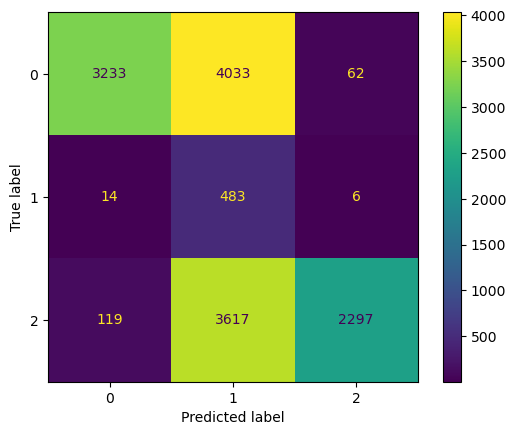

In [ ]:
#Confusion Matrix
cm_2c = confusion_matrix(y_test, y_pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()

In [ ]:
clf_svm = svm.SVC(kernel='linear', max_iter=2000,random_state=Shuffle_state, verbose=1, class_weight=weights).fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [41592, 65684]

In [ ]:
#Performance metrics
Accuracy_LR = accuracy_score(y_test, y_pred)
F1_LR = accuracy_score(y_test, y_pred)
Precision_LR = accuracy_score(y_test, y_pred)
Recall_LR = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.407530294287363
F1 score: 0.407530294287363
Recall score: 0.407530294287363
Precision score: 0.407530294287363


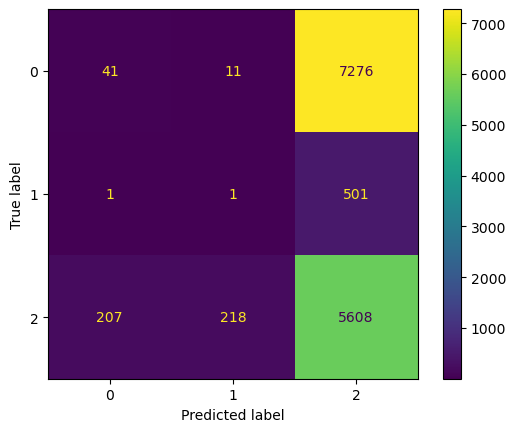

In [ ]:
#Confusion Matrix
cm_2c = confusion_matrix(y_test, y_pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()

### 3.2 Try 2: mlp (sklearn)


In [ ]:
# hl_size = (128, 64,64)
# #hl_size = (256, 256, 256, 128, 64)
# clf_mlp = MLPClassifier(hidden_layer_sizes=hl_size, activation='relu', solver='adam',
#                         alpha=0.0001, max_iter=1000, shuffle=True, random_state=Shuffle_state, verbose=True)
# clf_mlp.fit(X_train_scaled, y_train)
# y_pred = clf_mlp.predict(X_test_scaled)

mlp = MLPClassifier()

param_dist = {"hidden_layer_sizes": [(50,), (100,), (150,), (200,)],
              "activation": ["logistic", "tanh", "relu"],
              "solver": ["sgd", "adam"],
              "alpha": [0.0001, 0.001, 0.01],
              "learning_rate": ["constant", "adaptive"]}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, verbose=2, n_jobs=8)
random_search.fit(X_train_scaled, y_train)
y_pred = random_search.predict(X_test_scaled)

print(random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
#Performance metrics
Accuracy_LR = accuracy_score(y_test, y_pred)
F1_LR = accuracy_score(y_test, y_pred)
Precision_LR = accuracy_score(y_test, y_pred)
Recall_LR = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.8711771494518177
F1 score: 0.8711771494518177
Recall score: 0.8711771494518177
Precision score: 0.8711771494518177


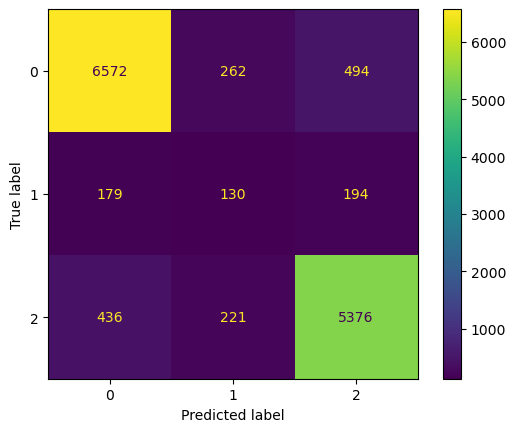

503
6033
7328


In [ ]:
#Confusion Matrix
cm_2c = confusion_matrix(y_test, y_pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()


### 3.3 Try 3: Random Forest

In [ ]:
rf = RandomForestClassifier()


param_dist = {"max_depth": [3, None],
              "max_features": np.arange(1, 10),
              "min_samples_split": np.arange(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy", "log_loss"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, verbose=3, n_jobs=8)

random_search.fit(X_train_scaled, y_train)
y_pred = random_search.predict(X_test_scaled)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
#Performance metrics
Accuracy_LR = accuracy_score(y_test, y_pred)
F1_LR = accuracy_score(y_test, y_pred)
Precision_LR = accuracy_score(y_test, y_pred)
Recall_LR = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.8868291979226774
F1 score: 0.8868291979226774
Recall score: 0.8868291979226774
Precision score: 0.8868291979226774


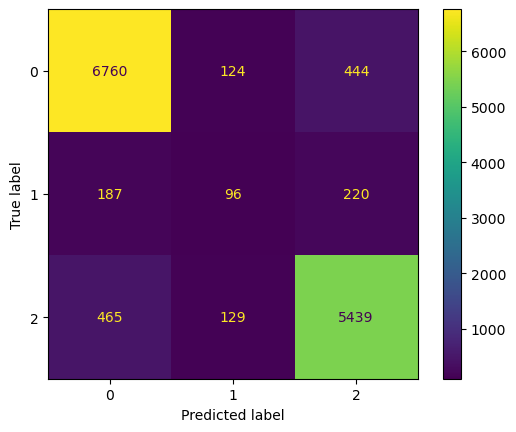

In [ ]:
#Confusion Matrix
cm_2c = confusion_matrix(y_test, y_pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()

### 3.4  Try 4: DNN (PyTorch)

In [14]:
# initialize the NN
class Data_tensor(Dataset):
    def __init__(self, X, y):
        X = np.float32(X)
        X = torch.from_numpy(X)
        y = np.longlong(y) - y.min()
        y = torch.from_numpy(y)
        
        self.X = X.to(device)
        self.y = y.to(device)
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    


In [15]:
# DNN class for random search
class DNN_rs(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(DNN_rs, self).__init__()
        depth=len(hidden_sizes)
        layers = []
        for i in range(depth):
            if i == 0:
                layers.append(nn.Linear(input_size, hidden_sizes[i])) 
            else:
                layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear( hidden_sizes[-1], output_size))
        self.linear_relu_stack = nn.Sequential(*layers)

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits


In [16]:
# Test output for DNN_rs
input_size = X_train_scaled.shape[1]
output_size = 3
model_rs = DNN_rs(input_size, hidden_sizes=[100], output_size=output_size)
print(model_rs)

DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=3, bias=True)
  )
)


In [17]:
# DNN class for normal training hidden sizes are fixed (512,512)
class DNN(nn.Module):
    def __init__(self, input_size=512, output_size=10):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, output_size)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = DNN(X.shape[1], 3).to(device)
print(model)

DNN(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=3, bias=True)
  )
)


In [18]:
# Train and test functions
def train(dataloader, model, loss_fn, optimizer):  
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        print(pred.dtype)
        print(y.dtype)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [19]:
# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # CrossEntropyLoss for multi-classification
optimizer = torch.optim.Adam(model.parameters(),weight_decay=0.005) # Adam optimizer for normal training
optimizer_rs = torch.optim.Adam(model_rs.parameters(),weight_decay=0.005)   # Adam optimizer for random search

####################
Fold 1
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.131274  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torc

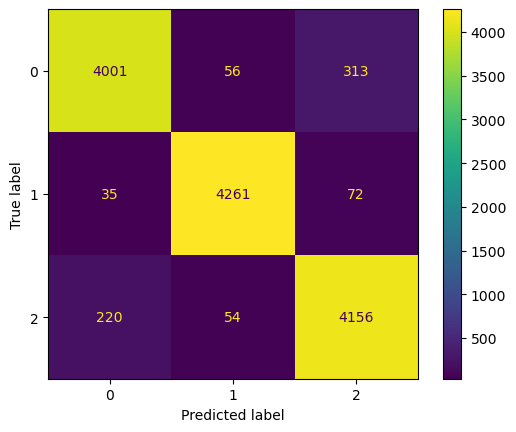

####################
####################
Fold 2
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.157704  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int

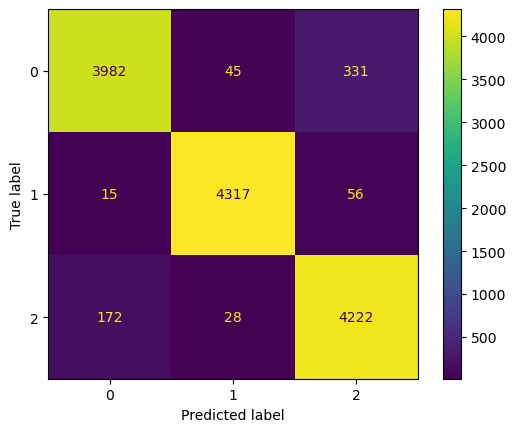

####################
####################
Fold 3
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.127541  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int

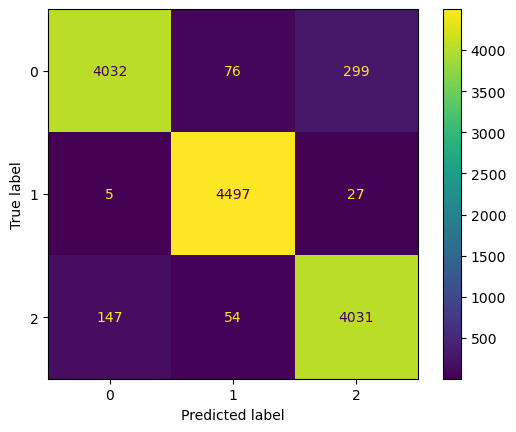

####################
####################
Fold 4
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.122701  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int

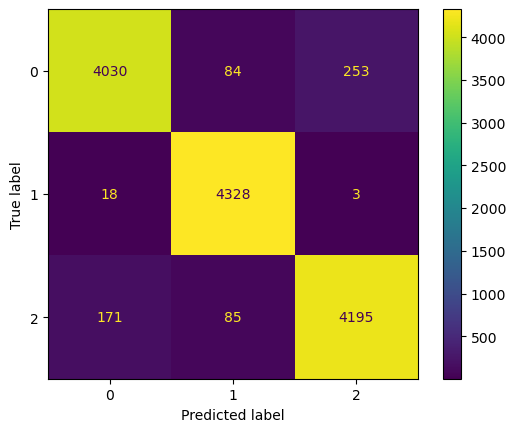

####################
####################
Fold 5
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.139954  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int

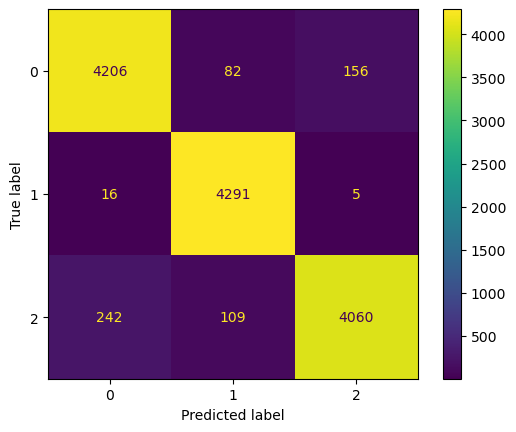

####################
####################
The average accuracy is 0.9509554532249103
####################
Accuracy: 0.874927870744374
F1 score: 0.874927870744374
Recall score: 0.874927870744374
Precision score: 0.874927870744374
zero value in validation set:  503


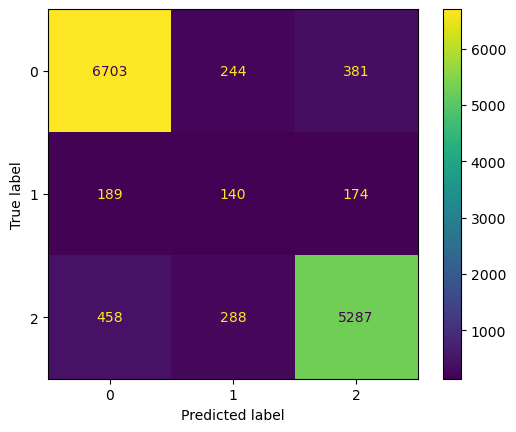

In [24]:
# K-fold cross validation for DNN
train_dataloader_list = []
val_dataloader_list = []
accuracy=[]
X_k_train, y_k_train, X_k_val, y_k_val = Kfold_split(X_train_scaled, y_train, Shuffle_state)
for i in range(len(X_k_train)):
    print("#"*20)
    print("Fold " + str(i+1))
    batch_size = 1024
    trainset_gpu = Data_tensor(X_k_train[i], y_k_train[i])
    valset_gpu = Data_tensor(X_k_val[i], y_k_val[i])
    train_dataloader = DataLoader(trainset_gpu, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(valset_gpu, batch_size=batch_size, shuffle=False)
    epochs = 5
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
        test(val_dataloader, model, loss_fn)
    print("Done!")
    print(model)
    model.eval()
    pred = model(val_dataloader.dataset[:][0]).detach().cpu().max(axis=1).indices.numpy()
    # print(pred)
    true = val_dataloader.dataset[:][1].cpu().numpy()
    # print(true)
    #Performance metrics
    Accuracy_LR = accuracy_score(true, pred)
    F1_LR = accuracy_score(true, pred)
    Precision_LR = accuracy_score(true, pred)
    Recall_LR = accuracy_score(true, pred)
    accuracy.append(Accuracy_LR)
    print("Accuracy: " + str(Accuracy_LR))
    print("F1 score: " + str(F1_LR))
    print("Recall score: " + str(Recall_LR))
    print("Precision score: " + str(Precision_LR))
    print("zero value in validation set: ",sum(true==1))
    cm_2c = confusion_matrix(true, pred)
    cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
    plt.show()
    print("#"*20)
print("#"*20)

print("The average accuracy is", np.mean(accuracy))
print("#"*20)


testset_gpu = Data_tensor(X_test_scaled, y_test)
test_dataloader = DataLoader(testset_gpu, batch_size=batch_size, shuffle=False)
model.eval()
pred = model(test_dataloader.dataset[:][0]).detach().cpu().max(axis=1).indices.numpy()
true = test_dataloader.dataset[:][1].cpu().numpy()
#Performance metrics
Accuracy_LR = accuracy_score(true, pred)
F1_LR = accuracy_score(true, pred)

Precision_LR = accuracy_score(true, pred)
Recall_LR = accuracy_score(true, pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

print("zero value in validation set: ",sum(true==1))
cm_2c = confusion_matrix(true, pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()



[[280, 423], [114], [343, 198, 470, 533], [364, 165], [549, 534, 396, 206, 201], [466, 382, 240], [593, 482], [352, 396, 386, 119, 228], [226], [123, 297]]
####################
Fold 1
hidden size:  [280, 423]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.119738  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
tor

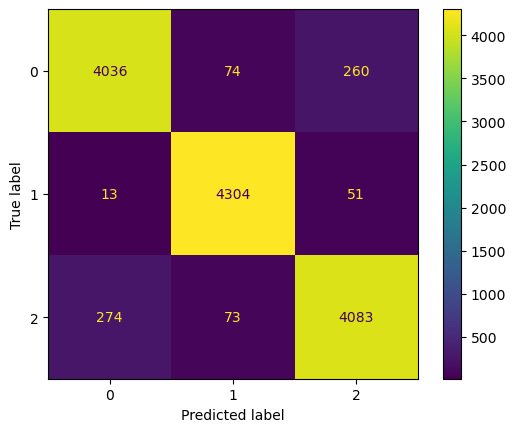

####################
hidden size:  [280, 423]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.133930  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

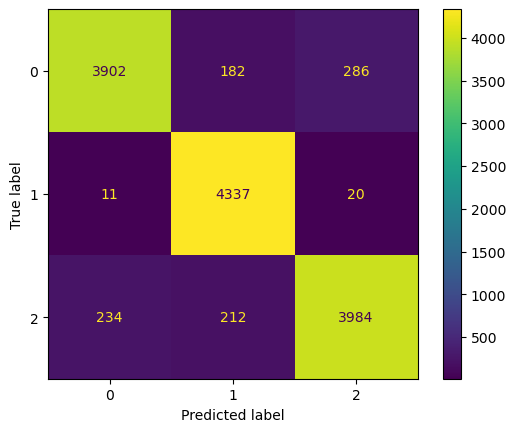

####################
hidden size:  [280, 423]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.131290  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


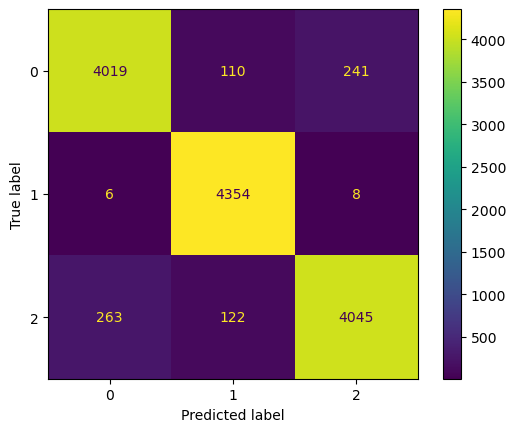

####################
hidden size:  [114]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.109222  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
tor

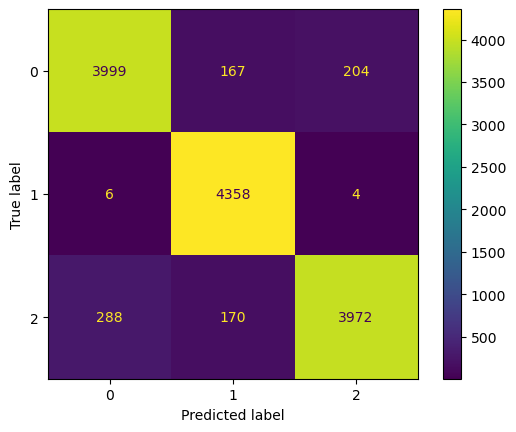

####################
hidden size:  [114]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.102182  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torc

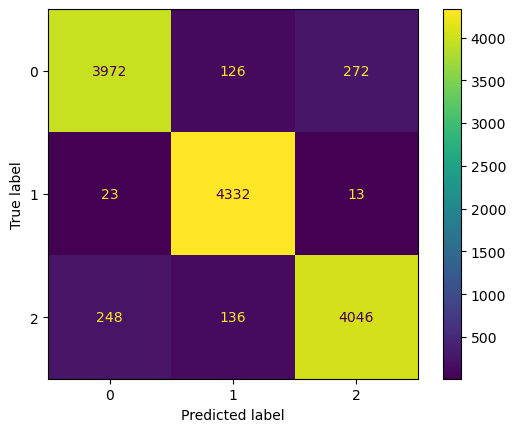

####################
hidden size:  [114]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.106831  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch

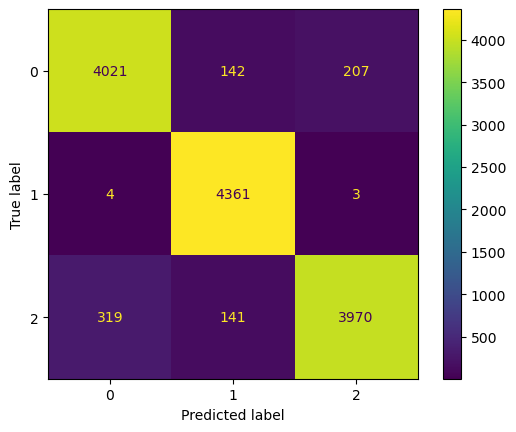

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.096307  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32


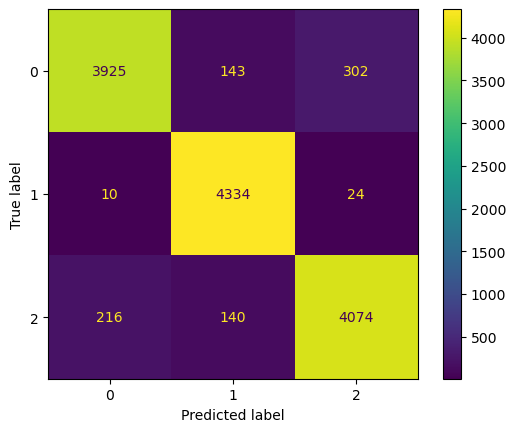

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.126487  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
t

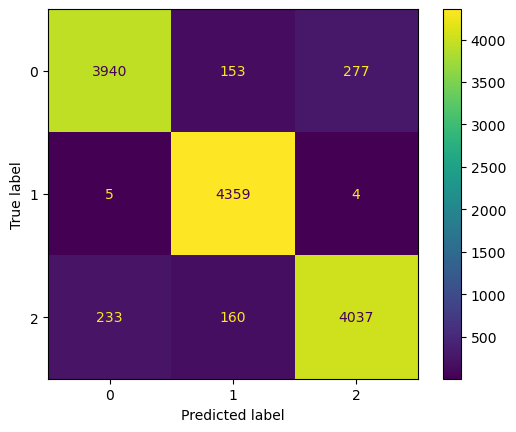

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.110184  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
to

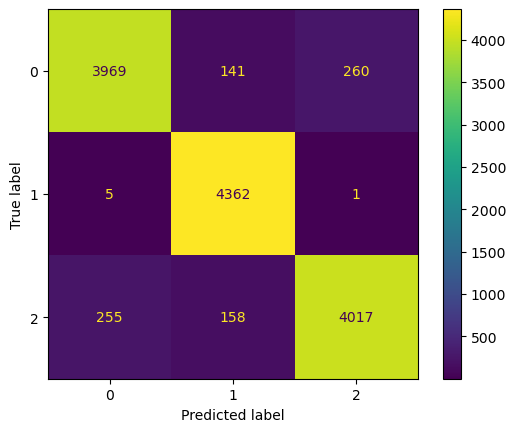

####################
hidden size:  [364, 165]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=364, bias=True)
    (1): ReLU()
    (2): Linear(in_features=364, out_features=165, bias=True)
    (3): ReLU()
    (4): Linear(in_features=165, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.105898  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int6

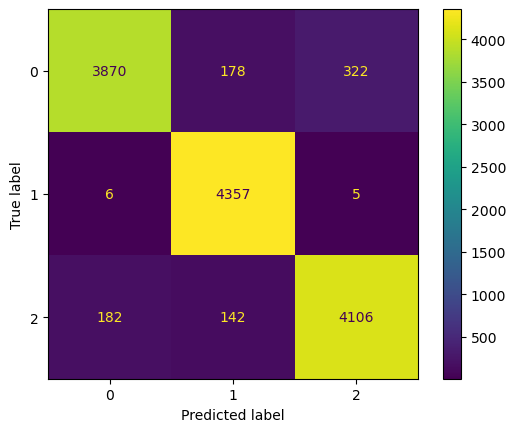

####################
hidden size:  [364, 165]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=364, bias=True)
    (1): ReLU()
    (2): Linear(in_features=364, out_features=165, bias=True)
    (3): ReLU()
    (4): Linear(in_features=165, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.104604  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

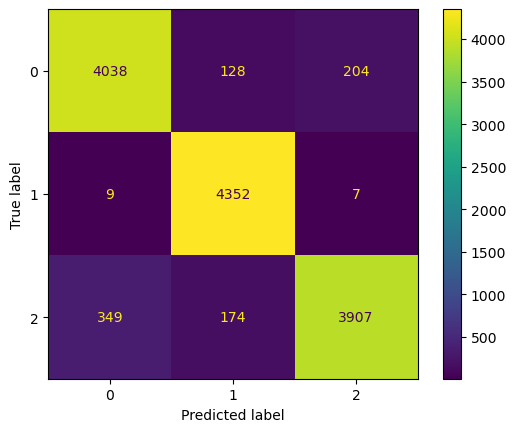

####################
hidden size:  [364, 165]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=364, bias=True)
    (1): ReLU()
    (2): Linear(in_features=364, out_features=165, bias=True)
    (3): ReLU()
    (4): Linear(in_features=165, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.103220  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


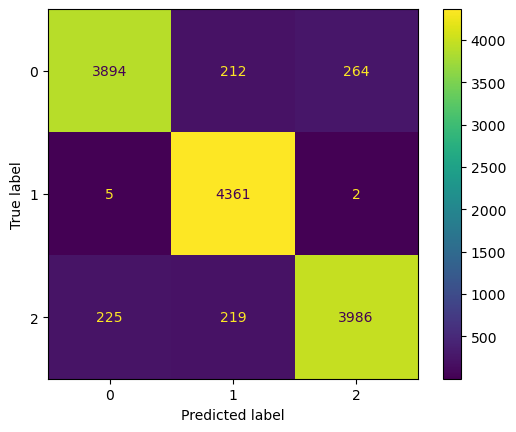

####################
hidden size:  [549, 534, 396, 206, 201]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=549, bias=True)
    (1): ReLU()
    (2): Linear(in_features=549, out_features=534, bias=True)
    (3): ReLU()
    (4): Linear(in_features=534, out_features=396, bias=True)
    (5): ReLU()
    (6): Linear(in_features=396, out_features=206, bias=True)
    (7): ReLU()
    (8): Linear(in_features=206, out_features=201, bias=True)
    (9): ReLU()
    (10): Linear(in_features=201, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.098285  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.fl

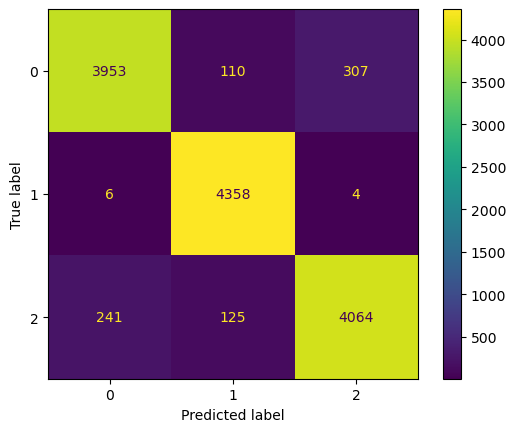

####################
hidden size:  [549, 534, 396, 206, 201]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=549, bias=True)
    (1): ReLU()
    (2): Linear(in_features=549, out_features=534, bias=True)
    (3): ReLU()
    (4): Linear(in_features=534, out_features=396, bias=True)
    (5): ReLU()
    (6): Linear(in_features=396, out_features=206, bias=True)
    (7): ReLU()
    (8): Linear(in_features=206, out_features=201, bias=True)
    (9): ReLU()
    (10): Linear(in_features=201, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.107266  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.flo

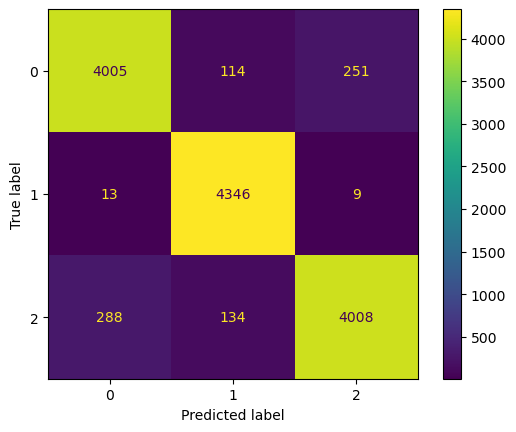

####################
hidden size:  [549, 534, 396, 206, 201]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=549, bias=True)
    (1): ReLU()
    (2): Linear(in_features=549, out_features=534, bias=True)
    (3): ReLU()
    (4): Linear(in_features=534, out_features=396, bias=True)
    (5): ReLU()
    (6): Linear(in_features=396, out_features=206, bias=True)
    (7): ReLU()
    (8): Linear(in_features=206, out_features=201, bias=True)
    (9): ReLU()
    (10): Linear(in_features=201, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.105446  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.floa

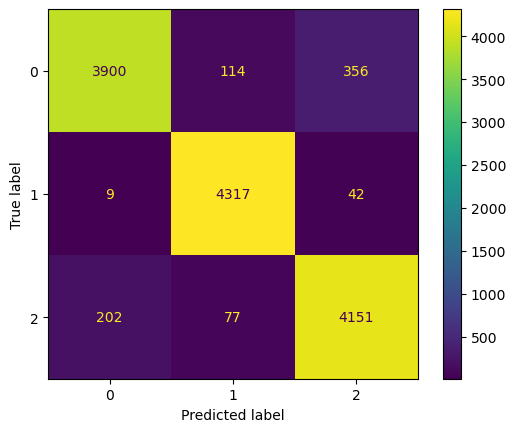

####################
hidden size:  [466, 382, 240]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=466, bias=True)
    (1): ReLU()
    (2): Linear(in_features=466, out_features=382, bias=True)
    (3): ReLU()
    (4): Linear(in_features=382, out_features=240, bias=True)
    (5): ReLU()
    (6): Linear(in_features=240, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.131367  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch

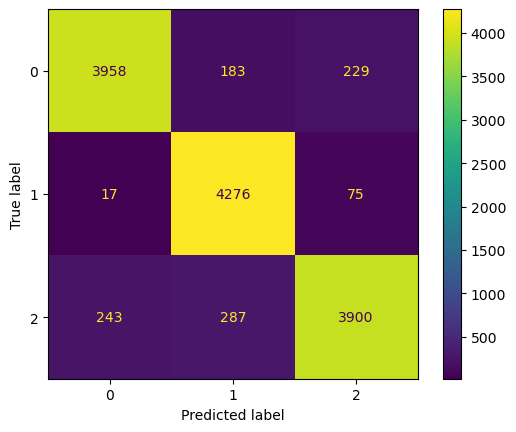

####################
hidden size:  [466, 382, 240]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=466, bias=True)
    (1): ReLU()
    (2): Linear(in_features=466, out_features=382, bias=True)
    (3): ReLU()
    (4): Linear(in_features=382, out_features=240, bias=True)
    (5): ReLU()
    (6): Linear(in_features=240, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.148766  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.

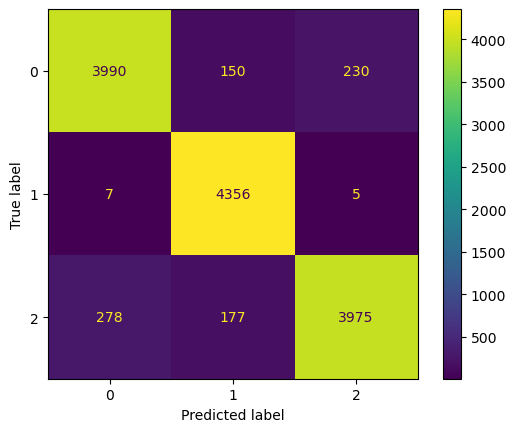

####################
hidden size:  [466, 382, 240]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=466, bias=True)
    (1): ReLU()
    (2): Linear(in_features=466, out_features=382, bias=True)
    (3): ReLU()
    (4): Linear(in_features=382, out_features=240, bias=True)
    (5): ReLU()
    (6): Linear(in_features=240, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.096460  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.i

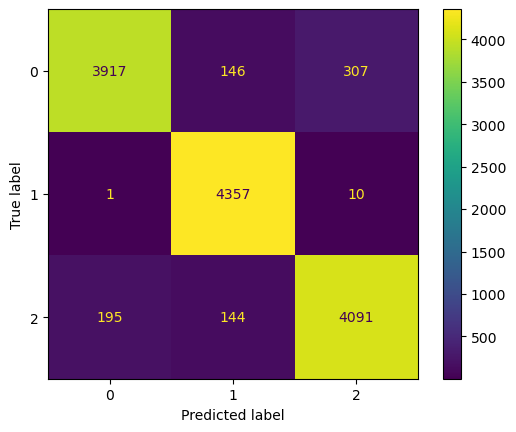

####################
hidden size:  [593, 482]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=593, bias=True)
    (1): ReLU()
    (2): Linear(in_features=593, out_features=482, bias=True)
    (3): ReLU()
    (4): Linear(in_features=482, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.100700  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int6

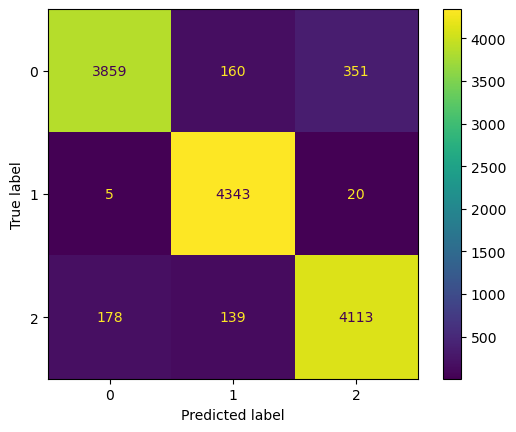

####################
hidden size:  [593, 482]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=593, bias=True)
    (1): ReLU()
    (2): Linear(in_features=593, out_features=482, bias=True)
    (3): ReLU()
    (4): Linear(in_features=482, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.095096  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

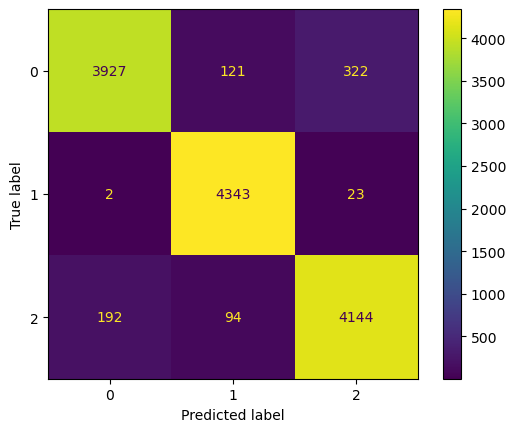

####################
hidden size:  [593, 482]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=593, bias=True)
    (1): ReLU()
    (2): Linear(in_features=593, out_features=482, bias=True)
    (3): ReLU()
    (4): Linear(in_features=482, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.096583  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


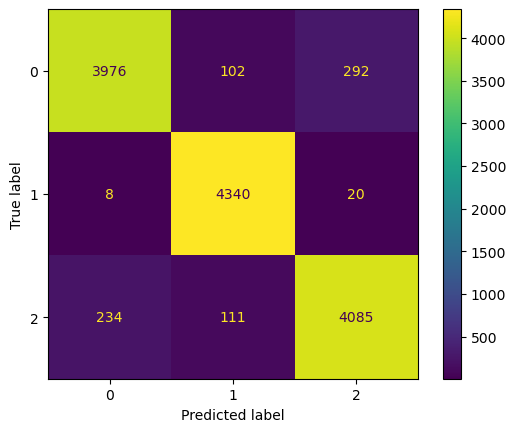

####################
hidden size:  [352, 396, 386, 119, 228]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=352, bias=True)
    (1): ReLU()
    (2): Linear(in_features=352, out_features=396, bias=True)
    (3): ReLU()
    (4): Linear(in_features=396, out_features=386, bias=True)
    (5): ReLU()
    (6): Linear(in_features=386, out_features=119, bias=True)
    (7): ReLU()
    (8): Linear(in_features=119, out_features=228, bias=True)
    (9): ReLU()
    (10): Linear(in_features=228, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.098053  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.fl

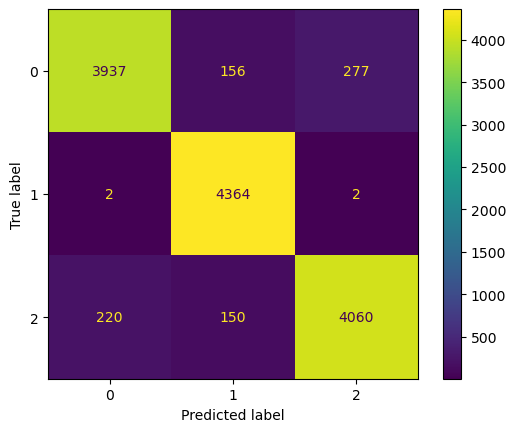

####################
hidden size:  [352, 396, 386, 119, 228]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=352, bias=True)
    (1): ReLU()
    (2): Linear(in_features=352, out_features=396, bias=True)
    (3): ReLU()
    (4): Linear(in_features=396, out_features=386, bias=True)
    (5): ReLU()
    (6): Linear(in_features=386, out_features=119, bias=True)
    (7): ReLU()
    (8): Linear(in_features=119, out_features=228, bias=True)
    (9): ReLU()
    (10): Linear(in_features=228, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.102991  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.flo

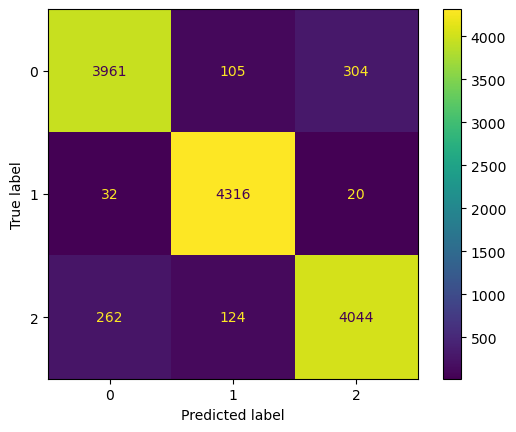

####################
hidden size:  [352, 396, 386, 119, 228]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=352, bias=True)
    (1): ReLU()
    (2): Linear(in_features=352, out_features=396, bias=True)
    (3): ReLU()
    (4): Linear(in_features=396, out_features=386, bias=True)
    (5): ReLU()
    (6): Linear(in_features=386, out_features=119, bias=True)
    (7): ReLU()
    (8): Linear(in_features=119, out_features=228, bias=True)
    (9): ReLU()
    (10): Linear(in_features=228, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.131614  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.floa

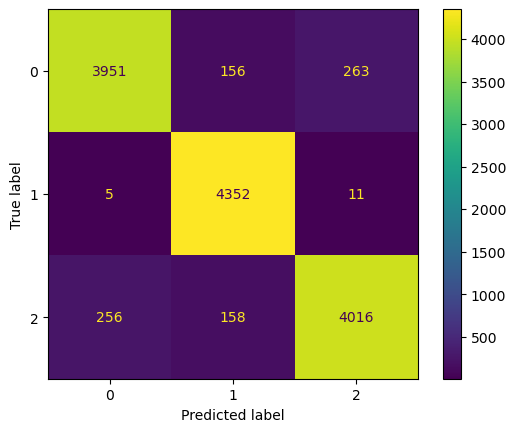

####################
hidden size:  [226]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=226, bias=True)
    (1): ReLU()
    (2): Linear(in_features=226, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.106563  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
tor

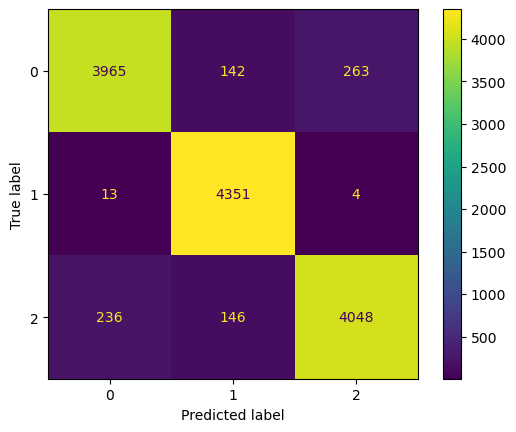

####################
hidden size:  [226]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=226, bias=True)
    (1): ReLU()
    (2): Linear(in_features=226, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.106641  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torc

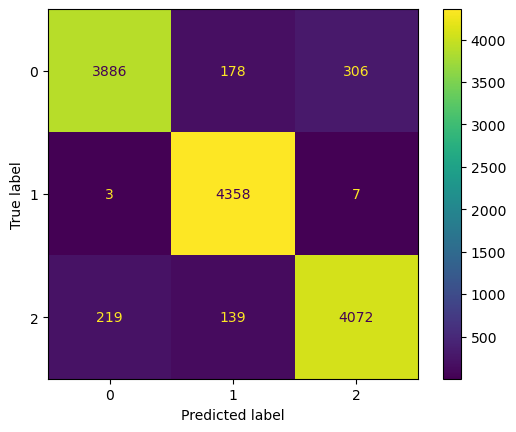

####################
hidden size:  [226]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=226, bias=True)
    (1): ReLU()
    (2): Linear(in_features=226, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.095503  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch

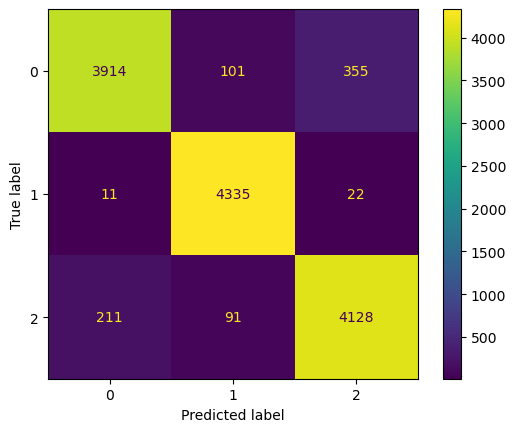

####################
hidden size:  [123, 297]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=123, bias=True)
    (1): ReLU()
    (2): Linear(in_features=123, out_features=297, bias=True)
    (3): ReLU()
    (4): Linear(in_features=297, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.103839  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int6

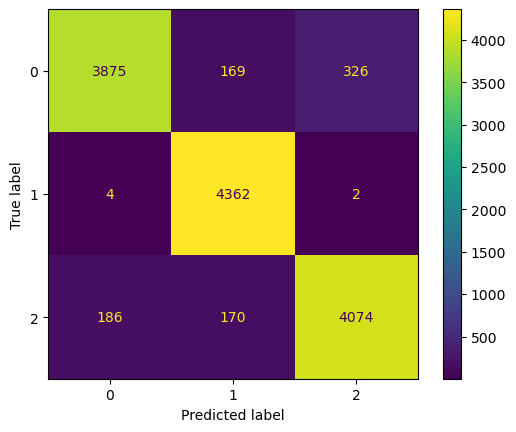

####################
hidden size:  [123, 297]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=123, bias=True)
    (1): ReLU()
    (2): Linear(in_features=123, out_features=297, bias=True)
    (3): ReLU()
    (4): Linear(in_features=297, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.105138  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

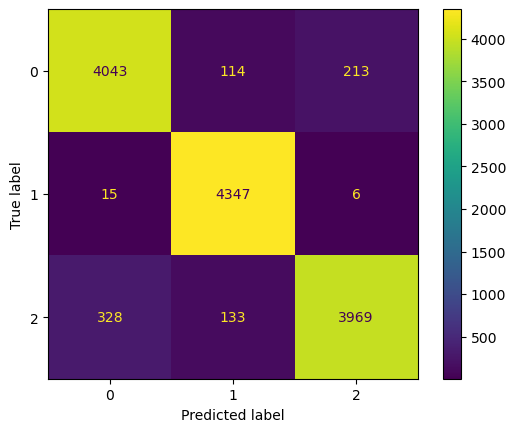

####################
hidden size:  [123, 297]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=123, bias=True)
    (1): ReLU()
    (2): Linear(in_features=123, out_features=297, bias=True)
    (3): ReLU()
    (4): Linear(in_features=297, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.093076  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


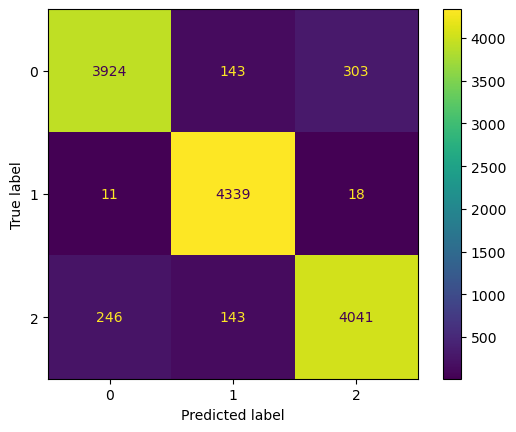

####################
####################
Fold 2
hidden size:  [280, 423]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.141956  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.in

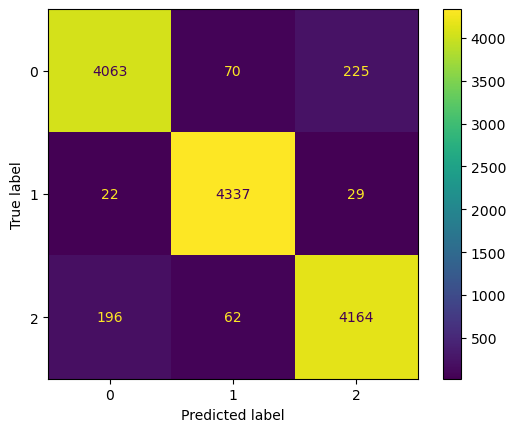

####################
hidden size:  [280, 423]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.122184  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

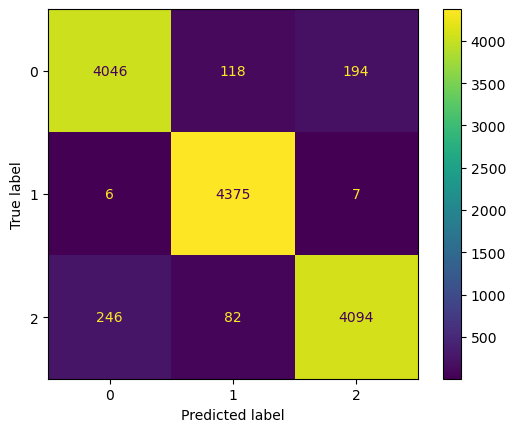

####################
hidden size:  [280, 423]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.105544  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


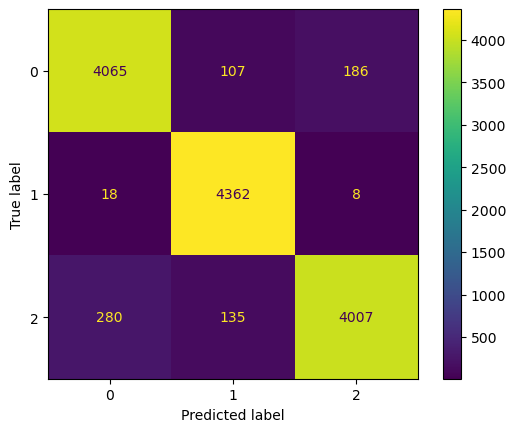

####################
hidden size:  [114]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.098340  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
tor

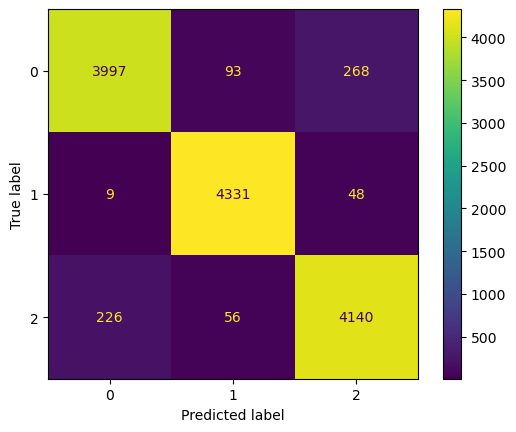

####################
hidden size:  [114]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.110638  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torc

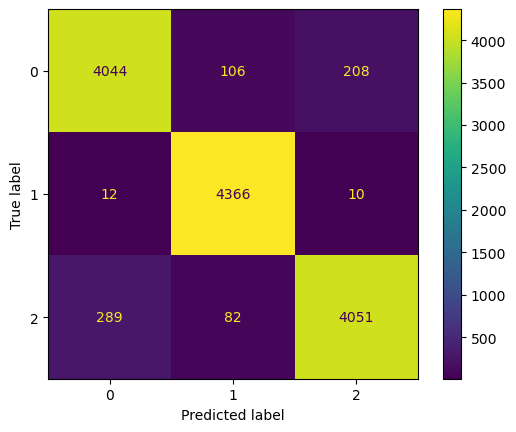

####################
hidden size:  [114]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.128192  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch

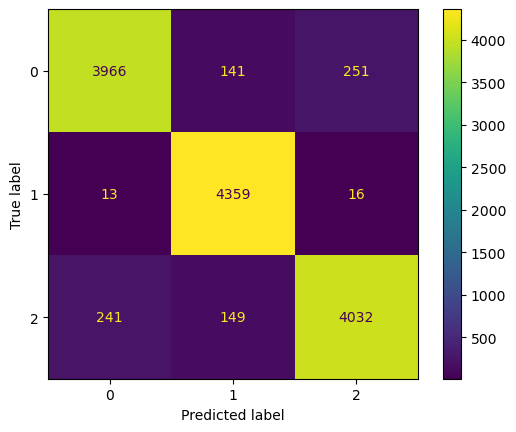

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.123512  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32


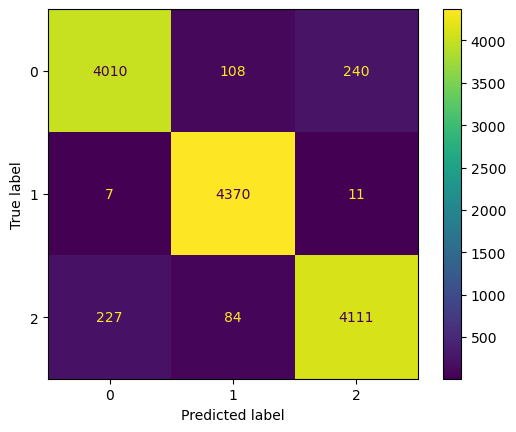

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.101429  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
t

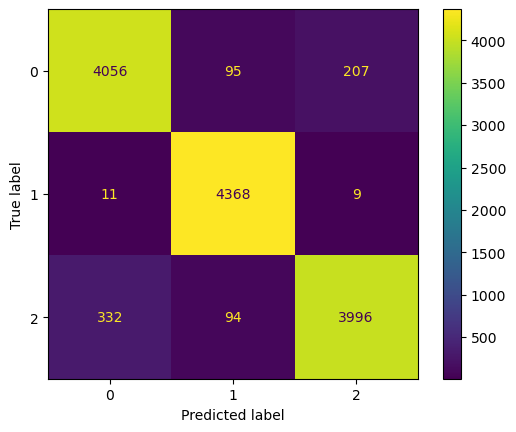

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.106200  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
to

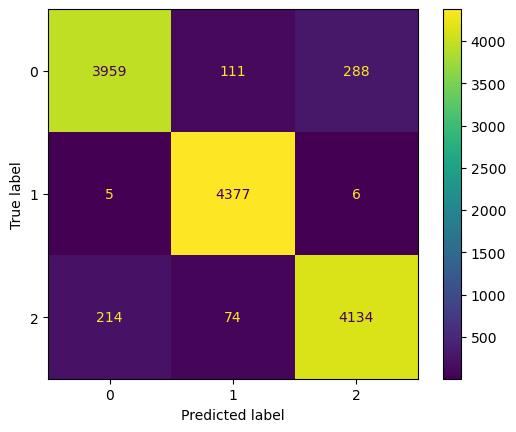

####################
hidden size:  [364, 165]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=364, bias=True)
    (1): ReLU()
    (2): Linear(in_features=364, out_features=165, bias=True)
    (3): ReLU()
    (4): Linear(in_features=165, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.099018  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int6

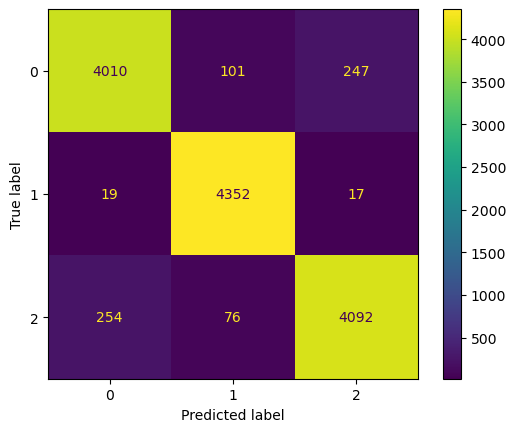

####################
hidden size:  [364, 165]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=364, bias=True)
    (1): ReLU()
    (2): Linear(in_features=364, out_features=165, bias=True)
    (3): ReLU()
    (4): Linear(in_features=165, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.134843  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

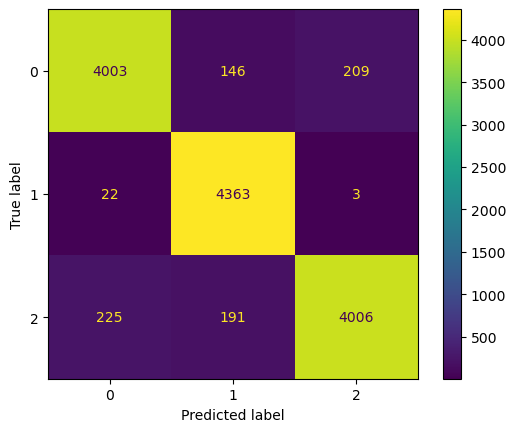

####################
hidden size:  [364, 165]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=364, bias=True)
    (1): ReLU()
    (2): Linear(in_features=364, out_features=165, bias=True)
    (3): ReLU()
    (4): Linear(in_features=165, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.105641  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


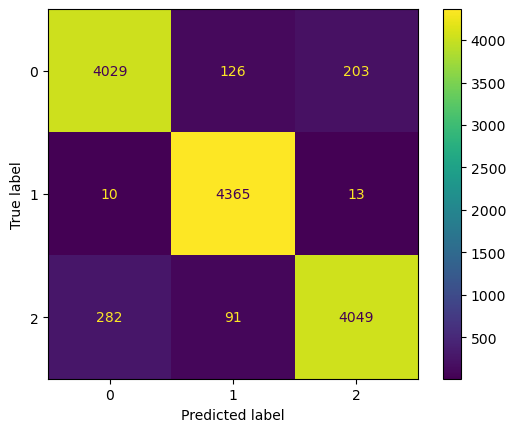

####################
hidden size:  [549, 534, 396, 206, 201]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=549, bias=True)
    (1): ReLU()
    (2): Linear(in_features=549, out_features=534, bias=True)
    (3): ReLU()
    (4): Linear(in_features=534, out_features=396, bias=True)
    (5): ReLU()
    (6): Linear(in_features=396, out_features=206, bias=True)
    (7): ReLU()
    (8): Linear(in_features=206, out_features=201, bias=True)
    (9): ReLU()
    (10): Linear(in_features=201, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.116630  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.fl

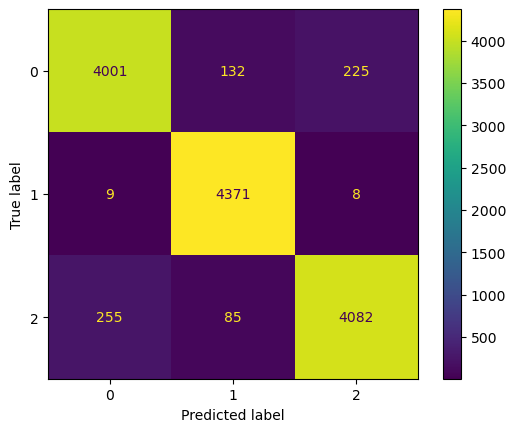

####################
hidden size:  [549, 534, 396, 206, 201]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=549, bias=True)
    (1): ReLU()
    (2): Linear(in_features=549, out_features=534, bias=True)
    (3): ReLU()
    (4): Linear(in_features=534, out_features=396, bias=True)
    (5): ReLU()
    (6): Linear(in_features=396, out_features=206, bias=True)
    (7): ReLU()
    (8): Linear(in_features=206, out_features=201, bias=True)
    (9): ReLU()
    (10): Linear(in_features=201, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.102845  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.flo

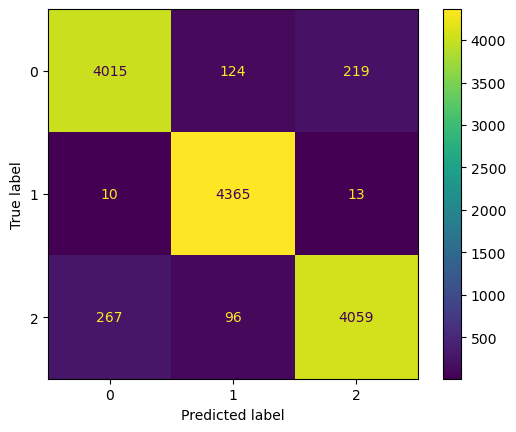

####################
hidden size:  [549, 534, 396, 206, 201]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=549, bias=True)
    (1): ReLU()
    (2): Linear(in_features=549, out_features=534, bias=True)
    (3): ReLU()
    (4): Linear(in_features=534, out_features=396, bias=True)
    (5): ReLU()
    (6): Linear(in_features=396, out_features=206, bias=True)
    (7): ReLU()
    (8): Linear(in_features=206, out_features=201, bias=True)
    (9): ReLU()
    (10): Linear(in_features=201, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.098720  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.floa

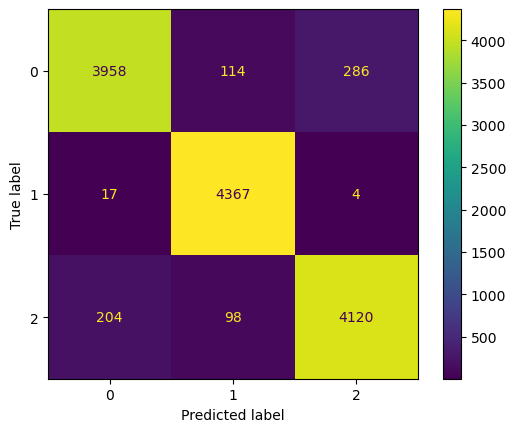

####################
hidden size:  [466, 382, 240]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=466, bias=True)
    (1): ReLU()
    (2): Linear(in_features=466, out_features=382, bias=True)
    (3): ReLU()
    (4): Linear(in_features=382, out_features=240, bias=True)
    (5): ReLU()
    (6): Linear(in_features=240, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.095111  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch

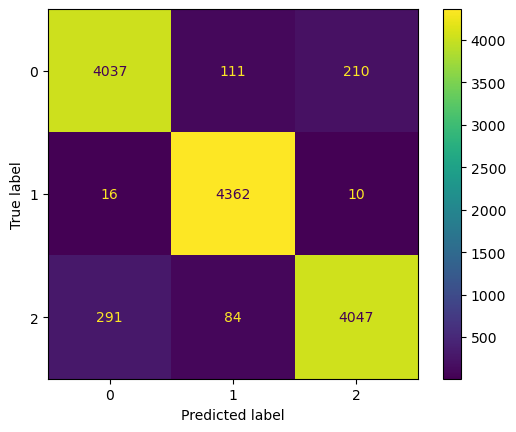

####################
hidden size:  [466, 382, 240]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=466, bias=True)
    (1): ReLU()
    (2): Linear(in_features=466, out_features=382, bias=True)
    (3): ReLU()
    (4): Linear(in_features=382, out_features=240, bias=True)
    (5): ReLU()
    (6): Linear(in_features=240, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.110627  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.

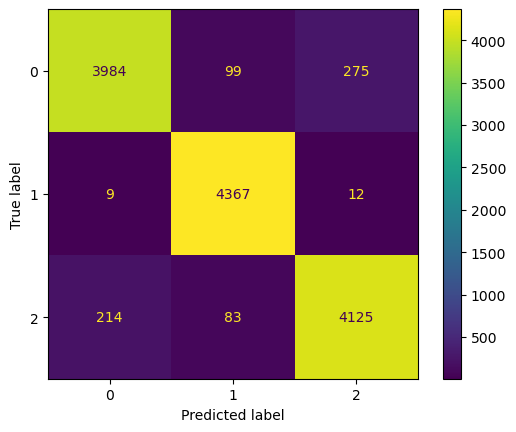

####################
hidden size:  [466, 382, 240]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=466, bias=True)
    (1): ReLU()
    (2): Linear(in_features=466, out_features=382, bias=True)
    (3): ReLU()
    (4): Linear(in_features=382, out_features=240, bias=True)
    (5): ReLU()
    (6): Linear(in_features=240, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.109712  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.i

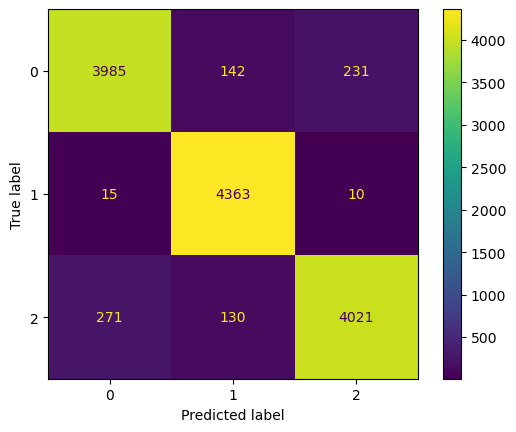

####################
hidden size:  [593, 482]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=593, bias=True)
    (1): ReLU()
    (2): Linear(in_features=593, out_features=482, bias=True)
    (3): ReLU()
    (4): Linear(in_features=482, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.094376  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int6

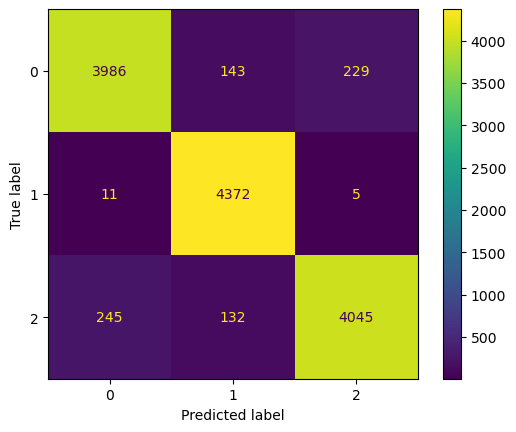

####################
hidden size:  [593, 482]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=593, bias=True)
    (1): ReLU()
    (2): Linear(in_features=593, out_features=482, bias=True)
    (3): ReLU()
    (4): Linear(in_features=482, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.096759  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

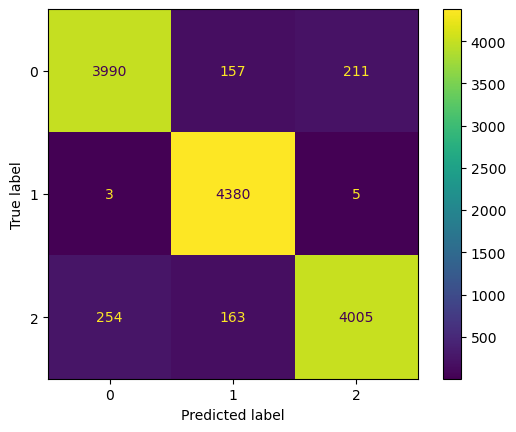

####################
hidden size:  [593, 482]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=593, bias=True)
    (1): ReLU()
    (2): Linear(in_features=593, out_features=482, bias=True)
    (3): ReLU()
    (4): Linear(in_features=482, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.123803  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


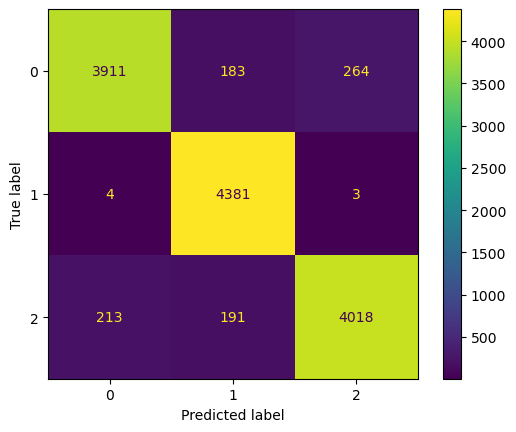

####################
hidden size:  [352, 396, 386, 119, 228]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=352, bias=True)
    (1): ReLU()
    (2): Linear(in_features=352, out_features=396, bias=True)
    (3): ReLU()
    (4): Linear(in_features=396, out_features=386, bias=True)
    (5): ReLU()
    (6): Linear(in_features=386, out_features=119, bias=True)
    (7): ReLU()
    (8): Linear(in_features=119, out_features=228, bias=True)
    (9): ReLU()
    (10): Linear(in_features=228, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.113350  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.fl

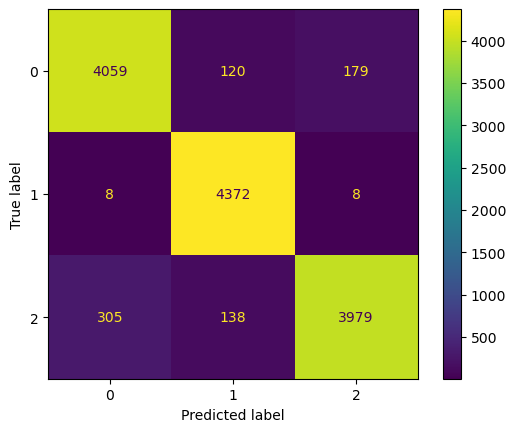

####################
hidden size:  [352, 396, 386, 119, 228]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=352, bias=True)
    (1): ReLU()
    (2): Linear(in_features=352, out_features=396, bias=True)
    (3): ReLU()
    (4): Linear(in_features=396, out_features=386, bias=True)
    (5): ReLU()
    (6): Linear(in_features=386, out_features=119, bias=True)
    (7): ReLU()
    (8): Linear(in_features=119, out_features=228, bias=True)
    (9): ReLU()
    (10): Linear(in_features=228, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.099308  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.flo

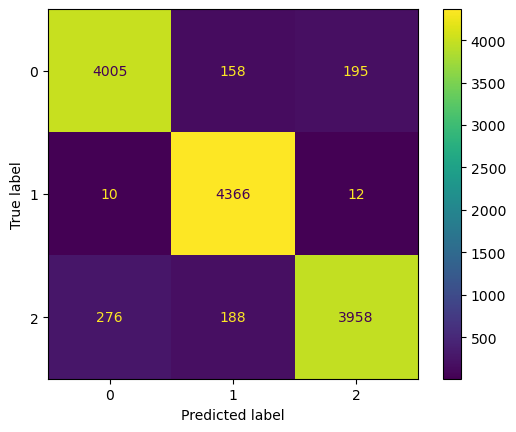

####################
hidden size:  [352, 396, 386, 119, 228]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=352, bias=True)
    (1): ReLU()
    (2): Linear(in_features=352, out_features=396, bias=True)
    (3): ReLU()
    (4): Linear(in_features=396, out_features=386, bias=True)
    (5): ReLU()
    (6): Linear(in_features=386, out_features=119, bias=True)
    (7): ReLU()
    (8): Linear(in_features=119, out_features=228, bias=True)
    (9): ReLU()
    (10): Linear(in_features=228, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.100735  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.floa

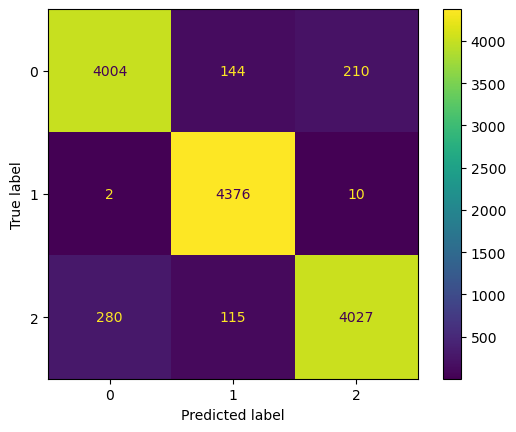

####################
hidden size:  [226]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=226, bias=True)
    (1): ReLU()
    (2): Linear(in_features=226, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.094051  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
tor

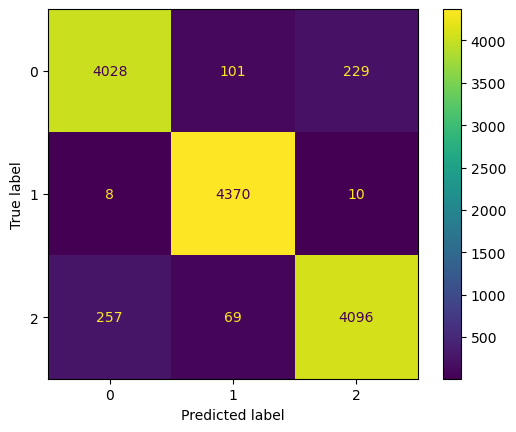

####################
hidden size:  [226]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=226, bias=True)
    (1): ReLU()
    (2): Linear(in_features=226, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.109598  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torc

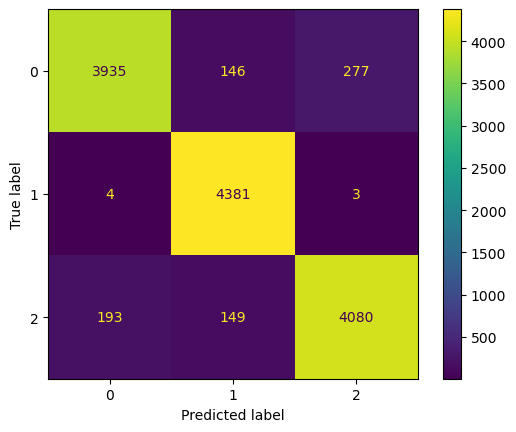

####################
hidden size:  [226]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=226, bias=True)
    (1): ReLU()
    (2): Linear(in_features=226, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.106395  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch

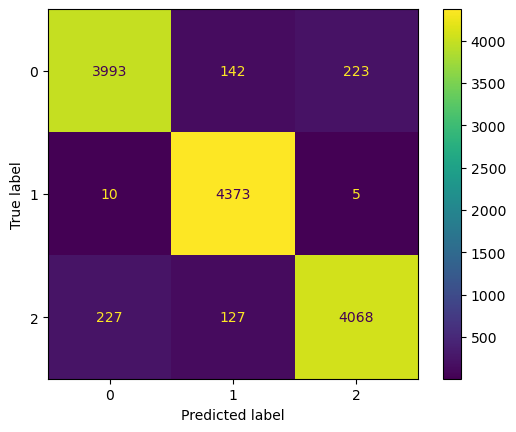

####################
hidden size:  [123, 297]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=123, bias=True)
    (1): ReLU()
    (2): Linear(in_features=123, out_features=297, bias=True)
    (3): ReLU()
    (4): Linear(in_features=297, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.100856  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int6

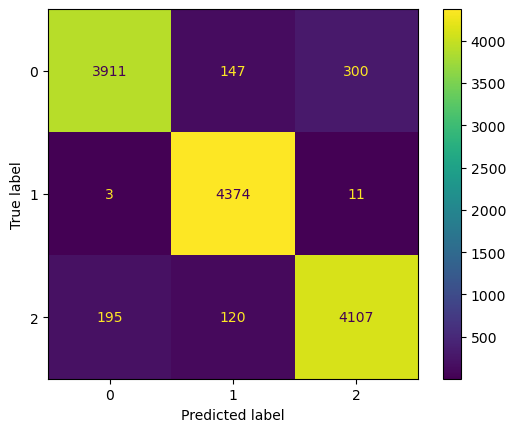

####################
hidden size:  [123, 297]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=123, bias=True)
    (1): ReLU()
    (2): Linear(in_features=123, out_features=297, bias=True)
    (3): ReLU()
    (4): Linear(in_features=297, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.113456  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

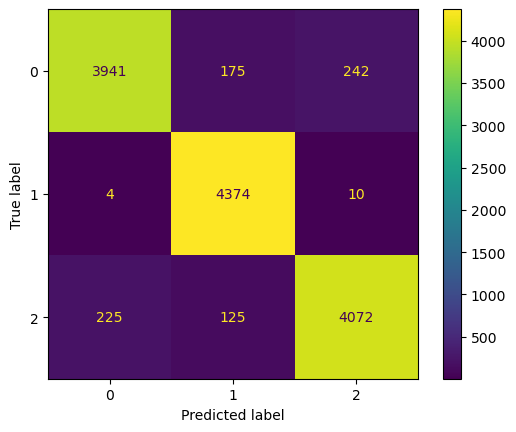

####################
hidden size:  [123, 297]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=123, bias=True)
    (1): ReLU()
    (2): Linear(in_features=123, out_features=297, bias=True)
    (3): ReLU()
    (4): Linear(in_features=297, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.092809  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


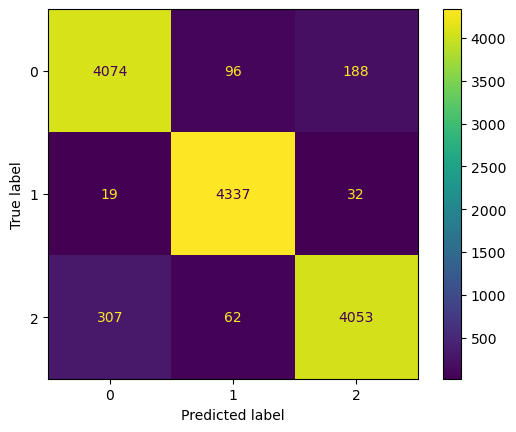

####################
####################
Fold 3
hidden size:  [280, 423]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.120381  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.in

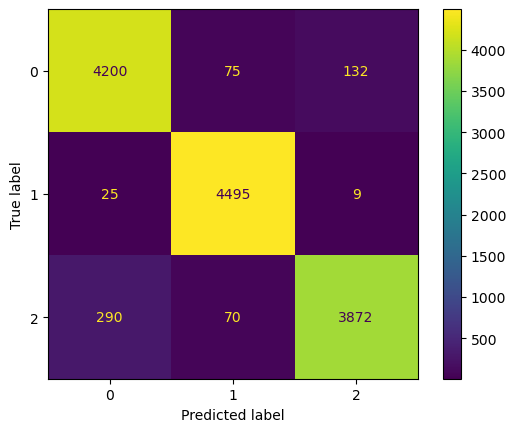

####################
hidden size:  [280, 423]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.129047  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

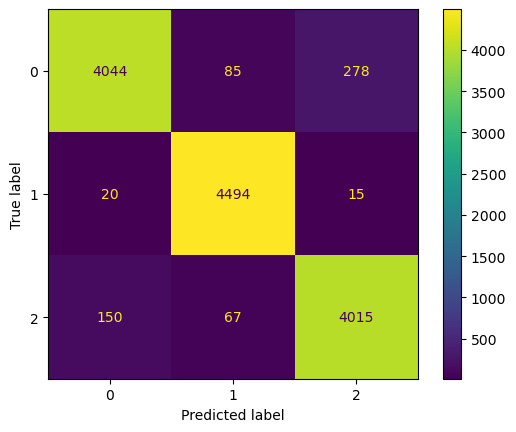

####################
hidden size:  [280, 423]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.097763  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


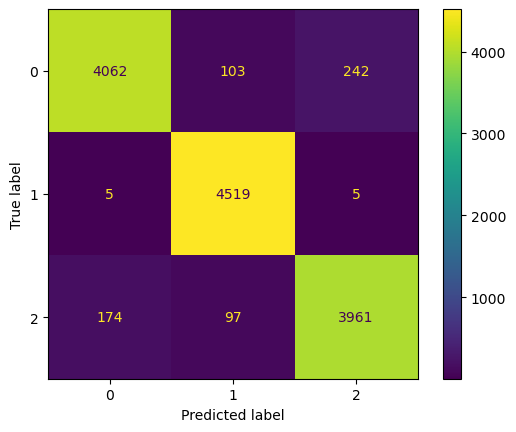

####################
hidden size:  [114]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.108046  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
tor

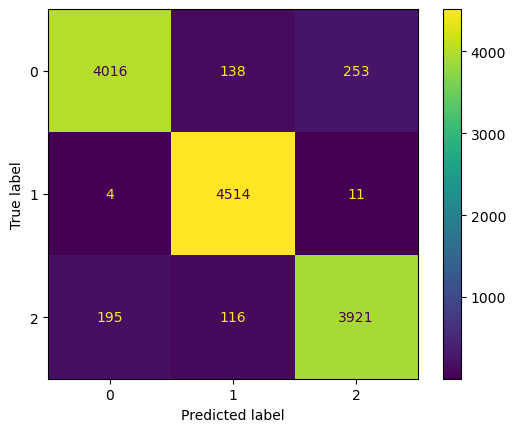

####################
hidden size:  [114]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.133353  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torc

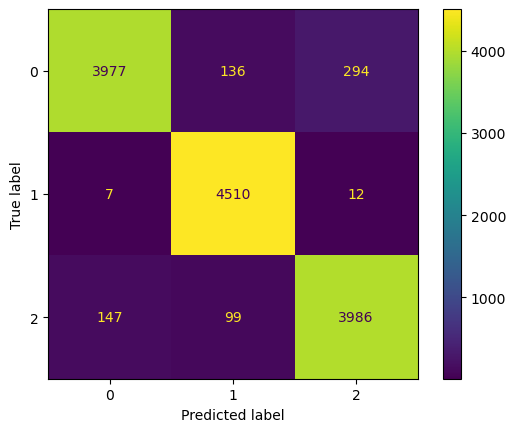

####################
hidden size:  [114]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.093238  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch

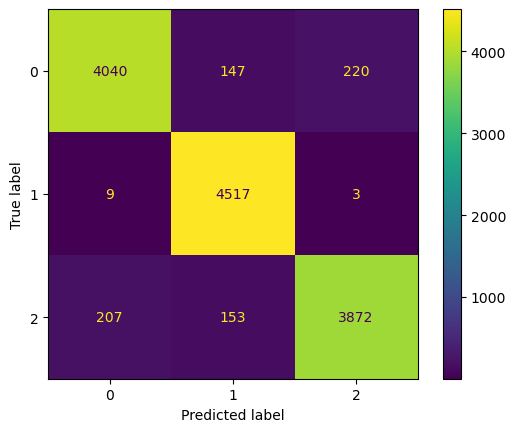

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.106544  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32


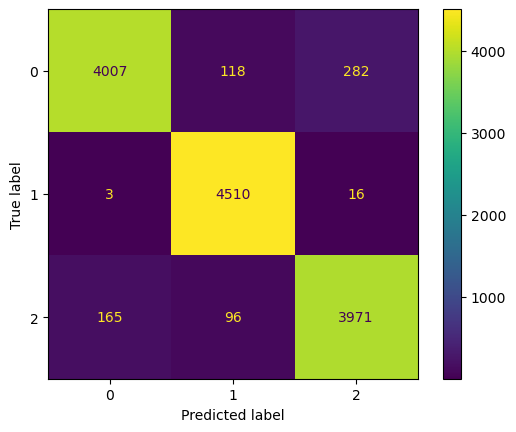

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.099846  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
t

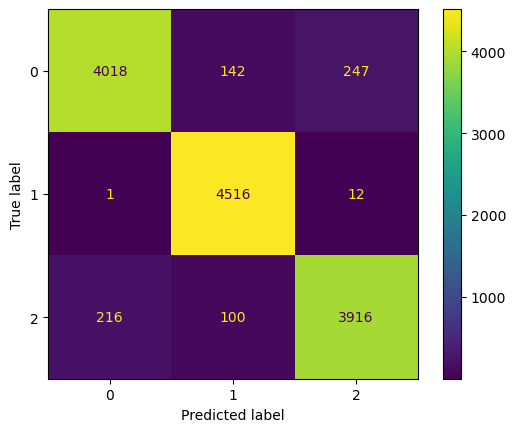

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.097811  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
to

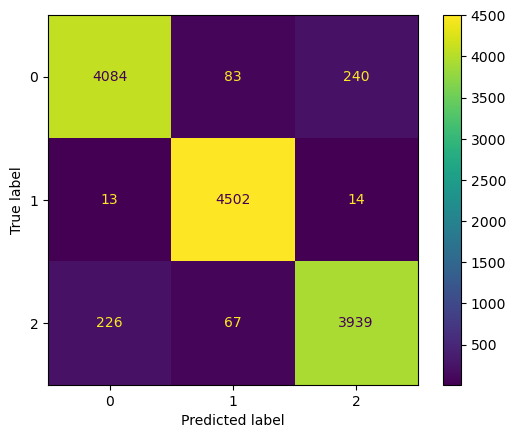

####################
hidden size:  [364, 165]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=364, bias=True)
    (1): ReLU()
    (2): Linear(in_features=364, out_features=165, bias=True)
    (3): ReLU()
    (4): Linear(in_features=165, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.108934  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int6

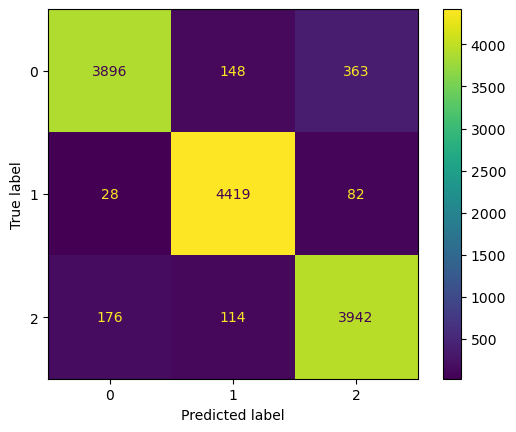

####################
hidden size:  [364, 165]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=364, bias=True)
    (1): ReLU()
    (2): Linear(in_features=364, out_features=165, bias=True)
    (3): ReLU()
    (4): Linear(in_features=165, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.149316  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

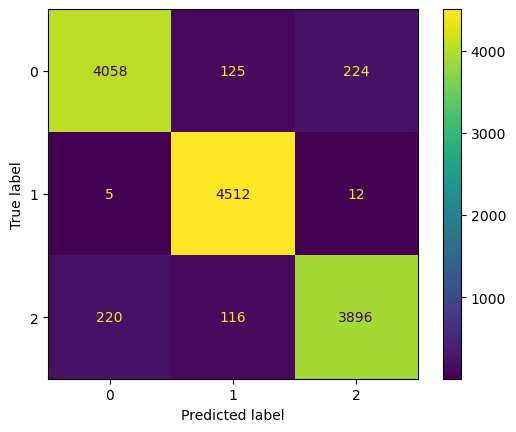

####################
hidden size:  [364, 165]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=364, bias=True)
    (1): ReLU()
    (2): Linear(in_features=364, out_features=165, bias=True)
    (3): ReLU()
    (4): Linear(in_features=165, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.099057  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


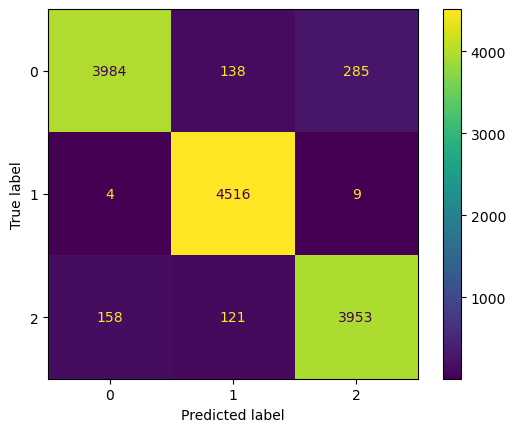

####################
hidden size:  [549, 534, 396, 206, 201]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=549, bias=True)
    (1): ReLU()
    (2): Linear(in_features=549, out_features=534, bias=True)
    (3): ReLU()
    (4): Linear(in_features=534, out_features=396, bias=True)
    (5): ReLU()
    (6): Linear(in_features=396, out_features=206, bias=True)
    (7): ReLU()
    (8): Linear(in_features=206, out_features=201, bias=True)
    (9): ReLU()
    (10): Linear(in_features=201, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.094526  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.fl

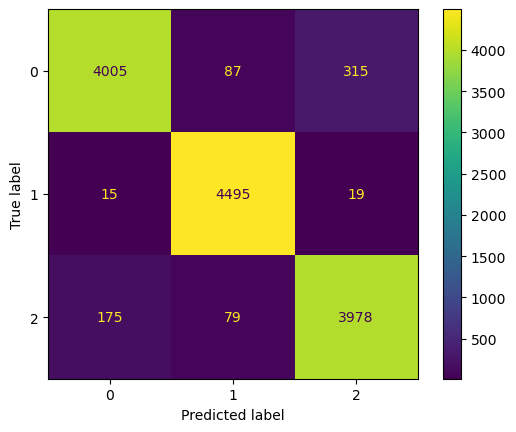

####################
hidden size:  [549, 534, 396, 206, 201]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=549, bias=True)
    (1): ReLU()
    (2): Linear(in_features=549, out_features=534, bias=True)
    (3): ReLU()
    (4): Linear(in_features=534, out_features=396, bias=True)
    (5): ReLU()
    (6): Linear(in_features=396, out_features=206, bias=True)
    (7): ReLU()
    (8): Linear(in_features=206, out_features=201, bias=True)
    (9): ReLU()
    (10): Linear(in_features=201, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.109230  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.flo

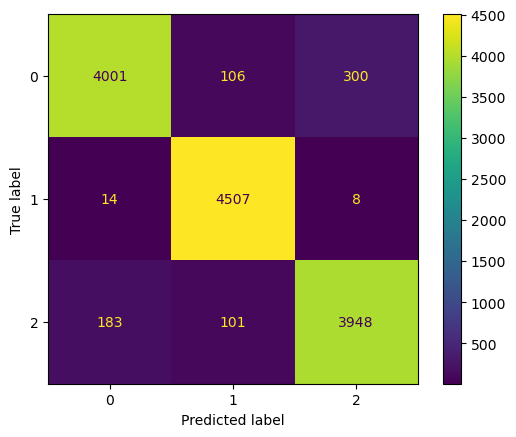

####################
hidden size:  [549, 534, 396, 206, 201]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=549, bias=True)
    (1): ReLU()
    (2): Linear(in_features=549, out_features=534, bias=True)
    (3): ReLU()
    (4): Linear(in_features=534, out_features=396, bias=True)
    (5): ReLU()
    (6): Linear(in_features=396, out_features=206, bias=True)
    (7): ReLU()
    (8): Linear(in_features=206, out_features=201, bias=True)
    (9): ReLU()
    (10): Linear(in_features=201, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.113458  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.floa

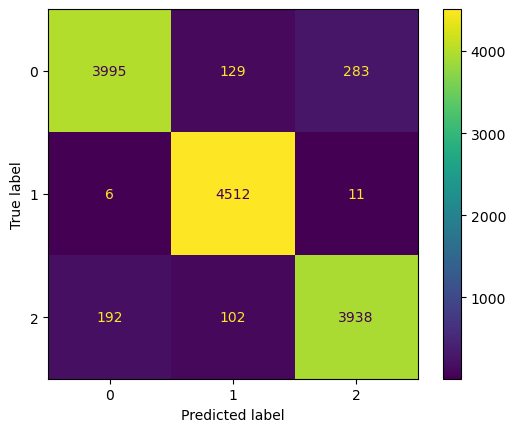

####################
hidden size:  [466, 382, 240]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=466, bias=True)
    (1): ReLU()
    (2): Linear(in_features=466, out_features=382, bias=True)
    (3): ReLU()
    (4): Linear(in_features=382, out_features=240, bias=True)
    (5): ReLU()
    (6): Linear(in_features=240, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.100253  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch

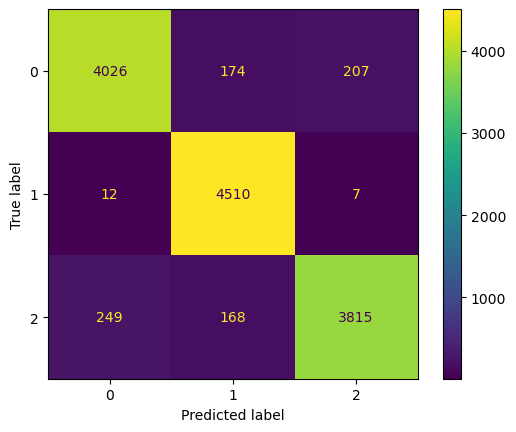

####################
hidden size:  [466, 382, 240]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=466, bias=True)
    (1): ReLU()
    (2): Linear(in_features=466, out_features=382, bias=True)
    (3): ReLU()
    (4): Linear(in_features=382, out_features=240, bias=True)
    (5): ReLU()
    (6): Linear(in_features=240, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.119109  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.

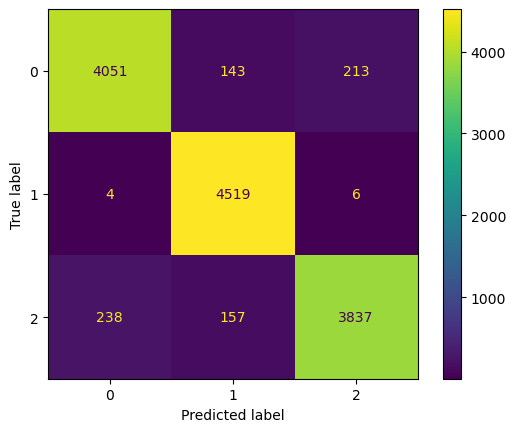

####################
hidden size:  [466, 382, 240]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=466, bias=True)
    (1): ReLU()
    (2): Linear(in_features=466, out_features=382, bias=True)
    (3): ReLU()
    (4): Linear(in_features=382, out_features=240, bias=True)
    (5): ReLU()
    (6): Linear(in_features=240, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.115192  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.i

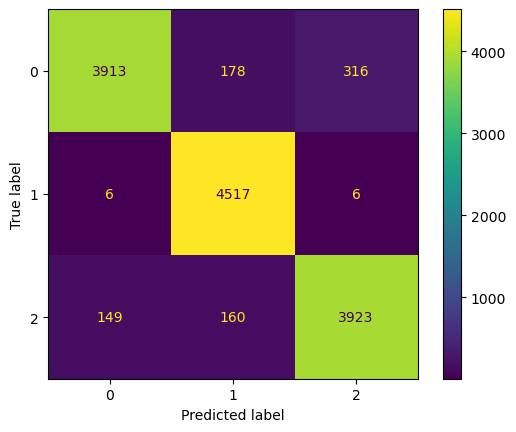

####################
hidden size:  [593, 482]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=593, bias=True)
    (1): ReLU()
    (2): Linear(in_features=593, out_features=482, bias=True)
    (3): ReLU()
    (4): Linear(in_features=482, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.127179  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int6

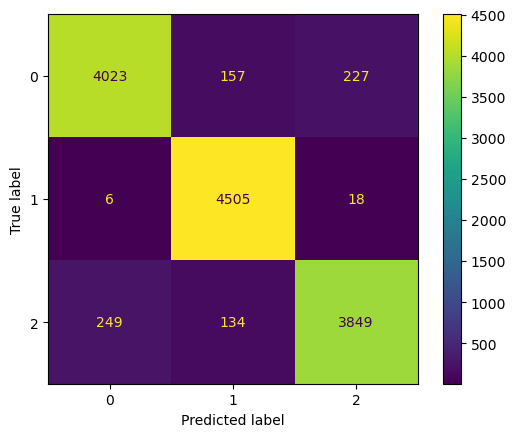

####################
hidden size:  [593, 482]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=593, bias=True)
    (1): ReLU()
    (2): Linear(in_features=593, out_features=482, bias=True)
    (3): ReLU()
    (4): Linear(in_features=482, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.156805  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

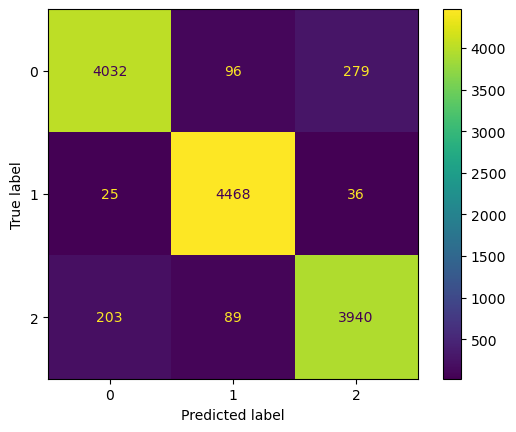

####################
hidden size:  [593, 482]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=593, bias=True)
    (1): ReLU()
    (2): Linear(in_features=593, out_features=482, bias=True)
    (3): ReLU()
    (4): Linear(in_features=482, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.102512  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


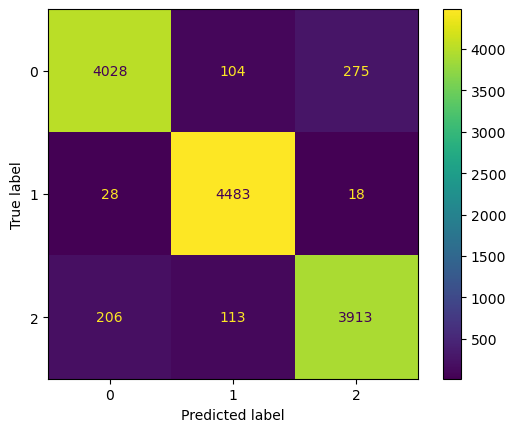

####################
hidden size:  [352, 396, 386, 119, 228]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=352, bias=True)
    (1): ReLU()
    (2): Linear(in_features=352, out_features=396, bias=True)
    (3): ReLU()
    (4): Linear(in_features=396, out_features=386, bias=True)
    (5): ReLU()
    (6): Linear(in_features=386, out_features=119, bias=True)
    (7): ReLU()
    (8): Linear(in_features=119, out_features=228, bias=True)
    (9): ReLU()
    (10): Linear(in_features=228, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.112248  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.fl

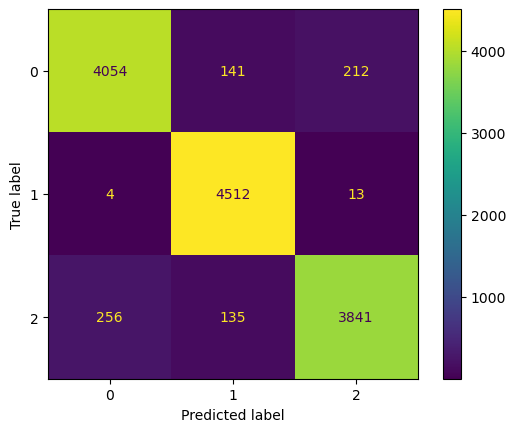

####################
hidden size:  [352, 396, 386, 119, 228]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=352, bias=True)
    (1): ReLU()
    (2): Linear(in_features=352, out_features=396, bias=True)
    (3): ReLU()
    (4): Linear(in_features=396, out_features=386, bias=True)
    (5): ReLU()
    (6): Linear(in_features=386, out_features=119, bias=True)
    (7): ReLU()
    (8): Linear(in_features=119, out_features=228, bias=True)
    (9): ReLU()
    (10): Linear(in_features=228, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.105176  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.flo

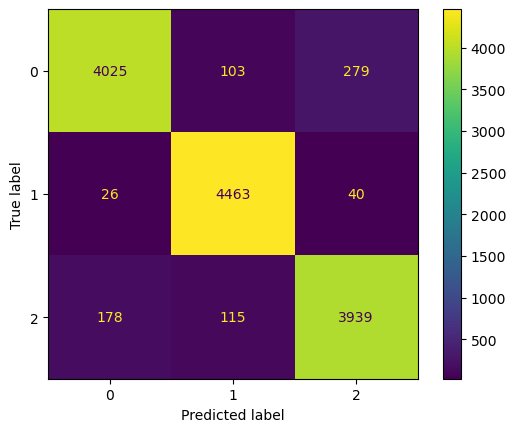

####################
hidden size:  [352, 396, 386, 119, 228]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=352, bias=True)
    (1): ReLU()
    (2): Linear(in_features=352, out_features=396, bias=True)
    (3): ReLU()
    (4): Linear(in_features=396, out_features=386, bias=True)
    (5): ReLU()
    (6): Linear(in_features=386, out_features=119, bias=True)
    (7): ReLU()
    (8): Linear(in_features=119, out_features=228, bias=True)
    (9): ReLU()
    (10): Linear(in_features=228, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.102205  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.floa

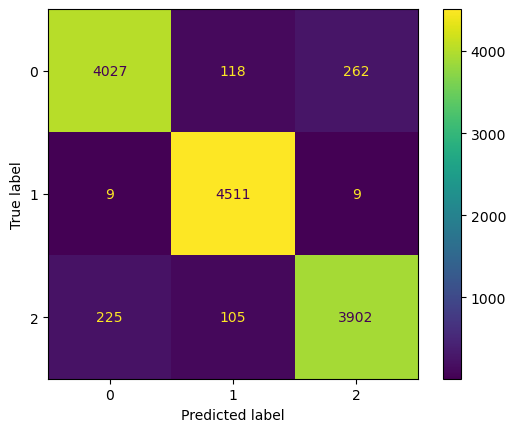

####################
hidden size:  [226]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=226, bias=True)
    (1): ReLU()
    (2): Linear(in_features=226, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.102365  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
tor

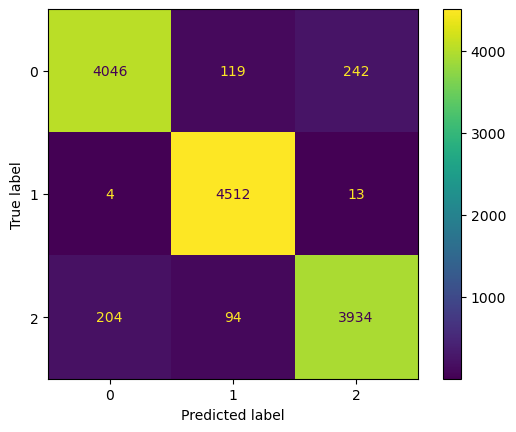

####################
hidden size:  [226]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=226, bias=True)
    (1): ReLU()
    (2): Linear(in_features=226, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.104784  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torc

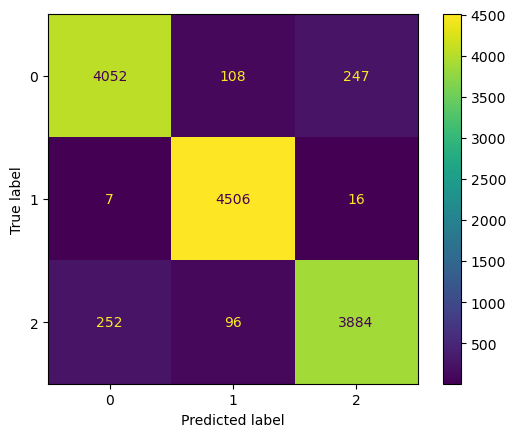

####################
hidden size:  [226]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=226, bias=True)
    (1): ReLU()
    (2): Linear(in_features=226, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.090929  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch

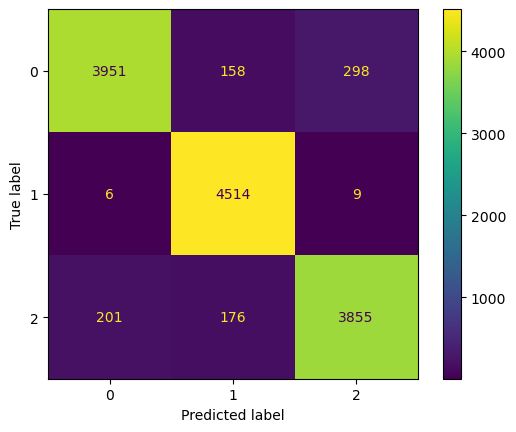

####################
hidden size:  [123, 297]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=123, bias=True)
    (1): ReLU()
    (2): Linear(in_features=123, out_features=297, bias=True)
    (3): ReLU()
    (4): Linear(in_features=297, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.126911  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int6

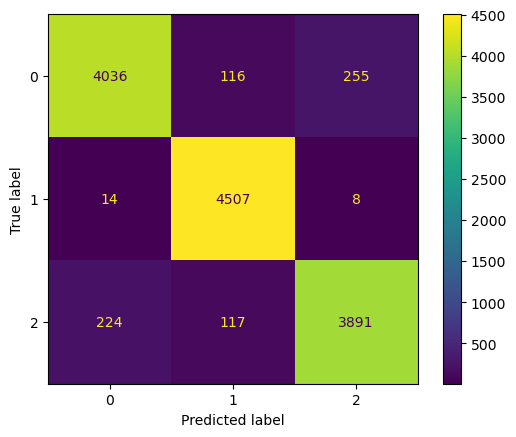

####################
hidden size:  [123, 297]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=123, bias=True)
    (1): ReLU()
    (2): Linear(in_features=123, out_features=297, bias=True)
    (3): ReLU()
    (4): Linear(in_features=297, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.101925  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

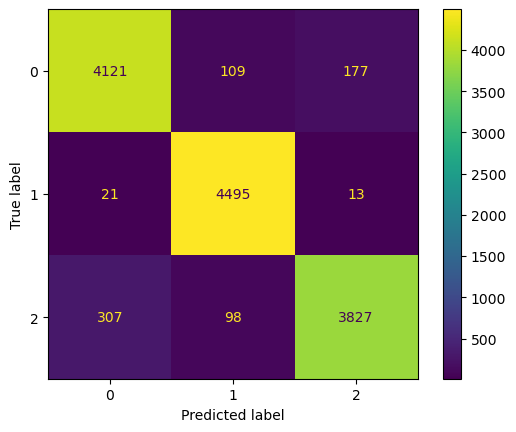

####################
hidden size:  [123, 297]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=123, bias=True)
    (1): ReLU()
    (2): Linear(in_features=123, out_features=297, bias=True)
    (3): ReLU()
    (4): Linear(in_features=297, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.101839  [ 1024/52670]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


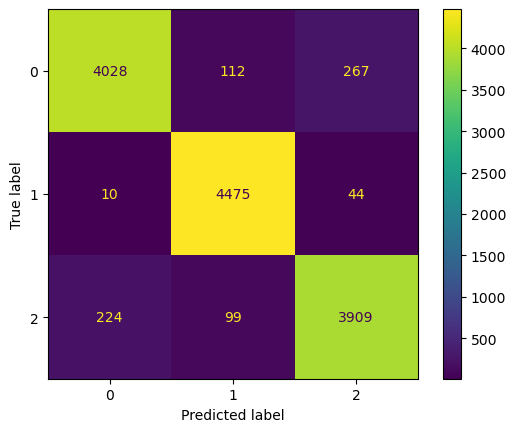

####################
####################
Fold 4
hidden size:  [280, 423]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.123083  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.in

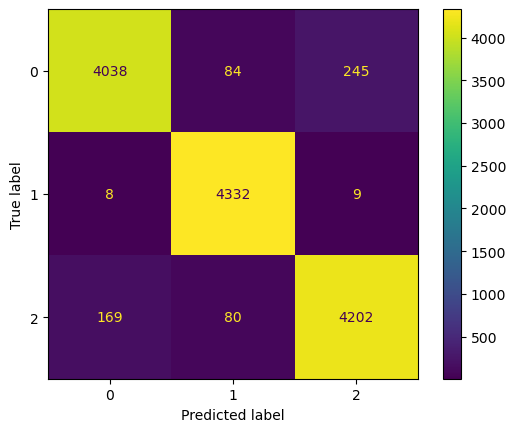

####################
hidden size:  [280, 423]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.128043  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

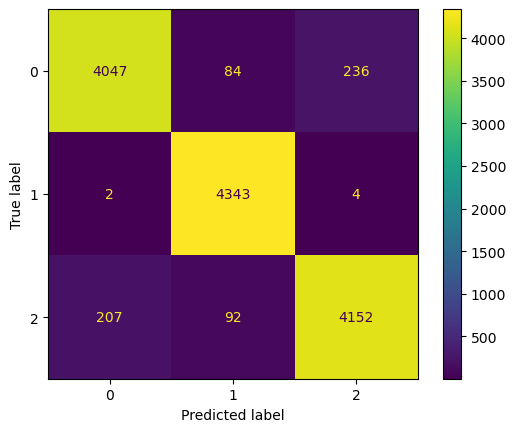

####################
hidden size:  [280, 423]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.095447  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


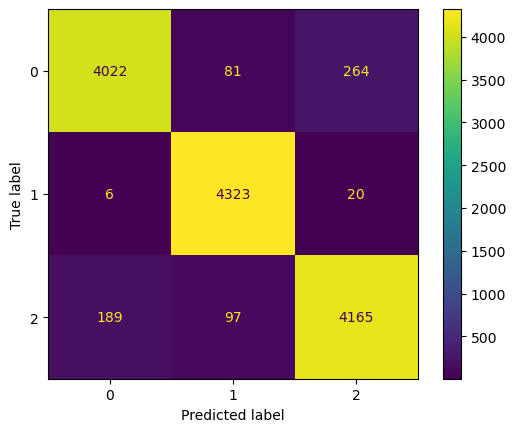

####################
hidden size:  [114]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.097434  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
tor

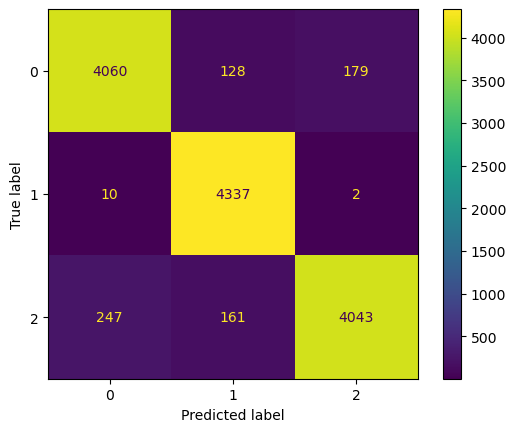

####################
hidden size:  [114]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.108905  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torc

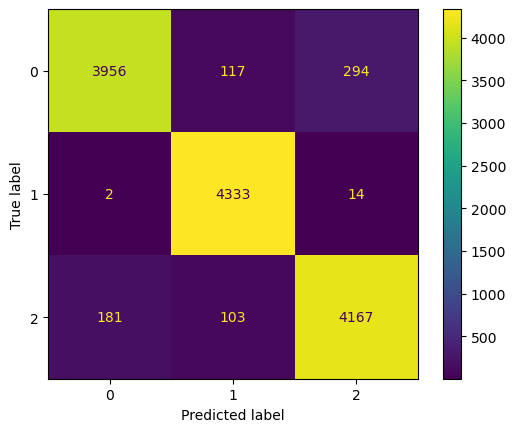

####################
hidden size:  [114]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.107087  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch

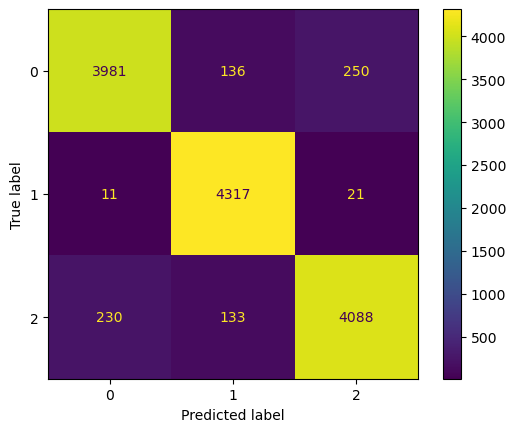

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.099619  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32


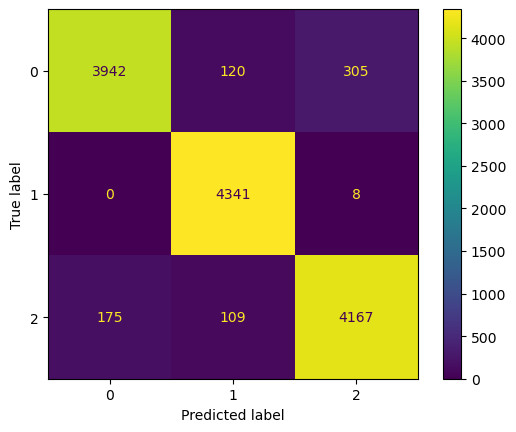

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.126016  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
t

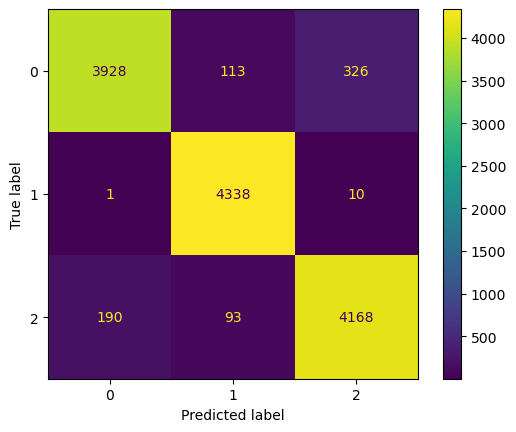

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.096529  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
to

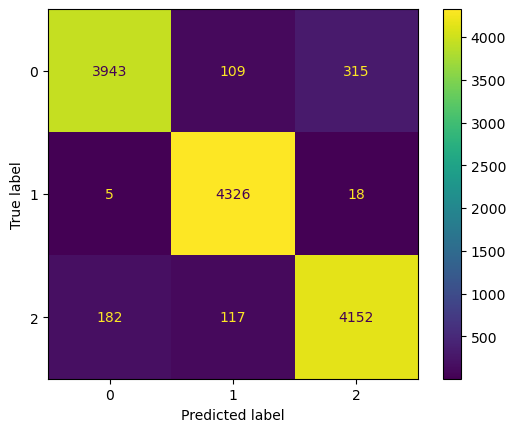

####################
hidden size:  [364, 165]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=364, bias=True)
    (1): ReLU()
    (2): Linear(in_features=364, out_features=165, bias=True)
    (3): ReLU()
    (4): Linear(in_features=165, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.133414  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int6

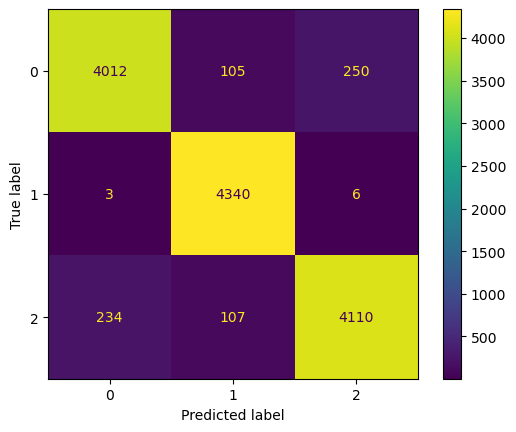

####################
hidden size:  [364, 165]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=364, bias=True)
    (1): ReLU()
    (2): Linear(in_features=364, out_features=165, bias=True)
    (3): ReLU()
    (4): Linear(in_features=165, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.116361  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

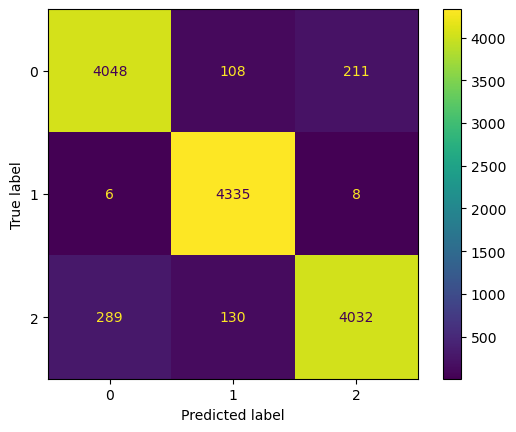

####################
hidden size:  [364, 165]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=364, bias=True)
    (1): ReLU()
    (2): Linear(in_features=364, out_features=165, bias=True)
    (3): ReLU()
    (4): Linear(in_features=165, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.100802  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


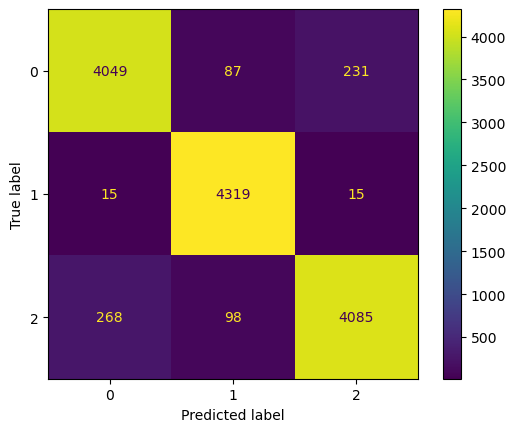

####################
hidden size:  [549, 534, 396, 206, 201]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=549, bias=True)
    (1): ReLU()
    (2): Linear(in_features=549, out_features=534, bias=True)
    (3): ReLU()
    (4): Linear(in_features=534, out_features=396, bias=True)
    (5): ReLU()
    (6): Linear(in_features=396, out_features=206, bias=True)
    (7): ReLU()
    (8): Linear(in_features=206, out_features=201, bias=True)
    (9): ReLU()
    (10): Linear(in_features=201, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.102634  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.fl

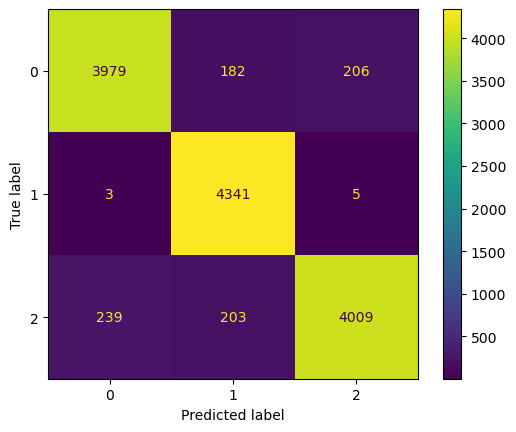

####################
hidden size:  [549, 534, 396, 206, 201]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=549, bias=True)
    (1): ReLU()
    (2): Linear(in_features=549, out_features=534, bias=True)
    (3): ReLU()
    (4): Linear(in_features=534, out_features=396, bias=True)
    (5): ReLU()
    (6): Linear(in_features=396, out_features=206, bias=True)
    (7): ReLU()
    (8): Linear(in_features=206, out_features=201, bias=True)
    (9): ReLU()
    (10): Linear(in_features=201, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.106688  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.flo

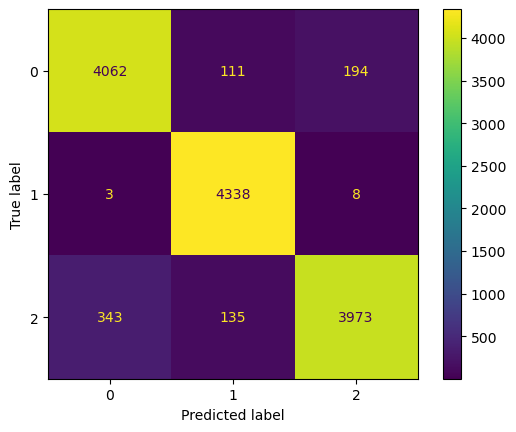

####################
hidden size:  [549, 534, 396, 206, 201]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=549, bias=True)
    (1): ReLU()
    (2): Linear(in_features=549, out_features=534, bias=True)
    (3): ReLU()
    (4): Linear(in_features=534, out_features=396, bias=True)
    (5): ReLU()
    (6): Linear(in_features=396, out_features=206, bias=True)
    (7): ReLU()
    (8): Linear(in_features=206, out_features=201, bias=True)
    (9): ReLU()
    (10): Linear(in_features=201, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.103326  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.floa

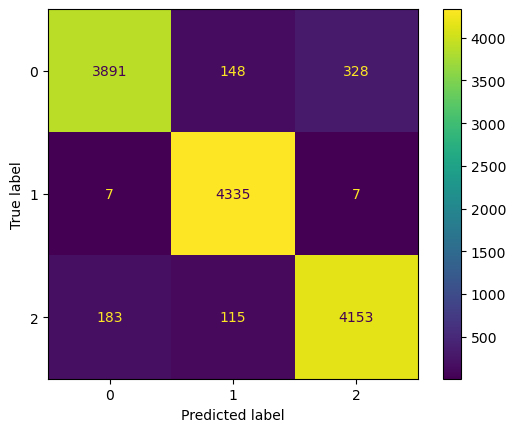

####################
hidden size:  [466, 382, 240]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=466, bias=True)
    (1): ReLU()
    (2): Linear(in_features=466, out_features=382, bias=True)
    (3): ReLU()
    (4): Linear(in_features=382, out_features=240, bias=True)
    (5): ReLU()
    (6): Linear(in_features=240, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.103572  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch

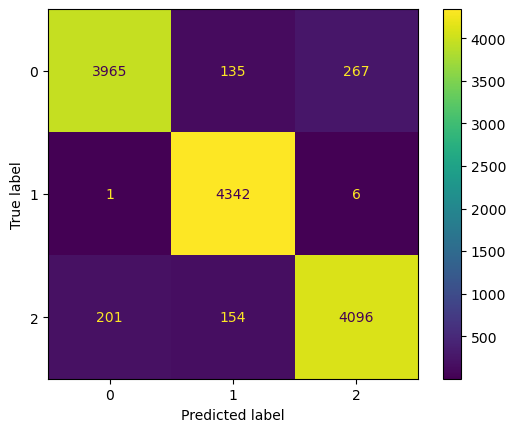

####################
hidden size:  [466, 382, 240]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=466, bias=True)
    (1): ReLU()
    (2): Linear(in_features=466, out_features=382, bias=True)
    (3): ReLU()
    (4): Linear(in_features=382, out_features=240, bias=True)
    (5): ReLU()
    (6): Linear(in_features=240, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.123670  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.

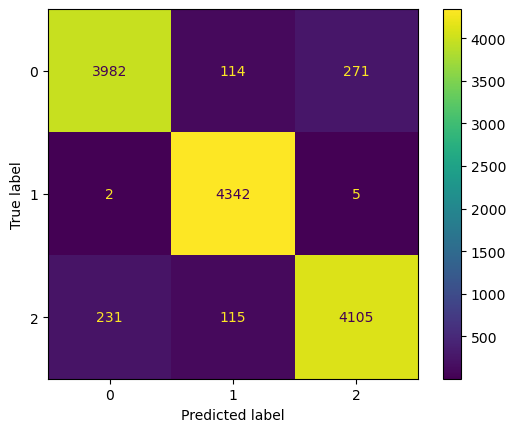

####################
hidden size:  [466, 382, 240]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=466, bias=True)
    (1): ReLU()
    (2): Linear(in_features=466, out_features=382, bias=True)
    (3): ReLU()
    (4): Linear(in_features=382, out_features=240, bias=True)
    (5): ReLU()
    (6): Linear(in_features=240, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.099387  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.i

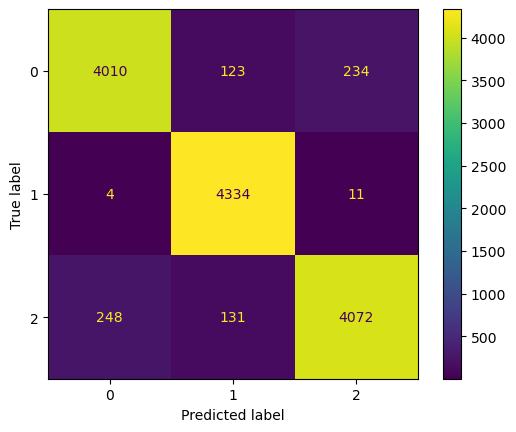

####################
hidden size:  [593, 482]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=593, bias=True)
    (1): ReLU()
    (2): Linear(in_features=593, out_features=482, bias=True)
    (3): ReLU()
    (4): Linear(in_features=482, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.102285  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int6

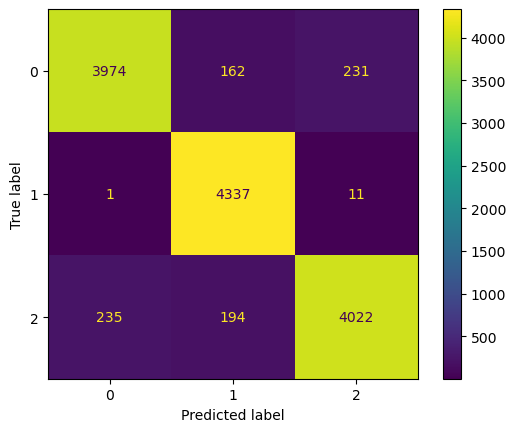

####################
hidden size:  [593, 482]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=593, bias=True)
    (1): ReLU()
    (2): Linear(in_features=593, out_features=482, bias=True)
    (3): ReLU()
    (4): Linear(in_features=482, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.097322  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

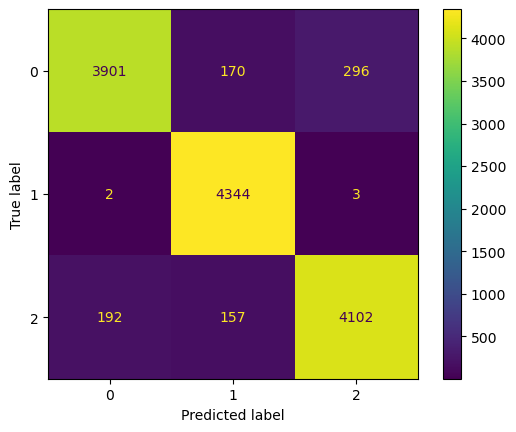

####################
hidden size:  [593, 482]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=593, bias=True)
    (1): ReLU()
    (2): Linear(in_features=593, out_features=482, bias=True)
    (3): ReLU()
    (4): Linear(in_features=482, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.103767  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


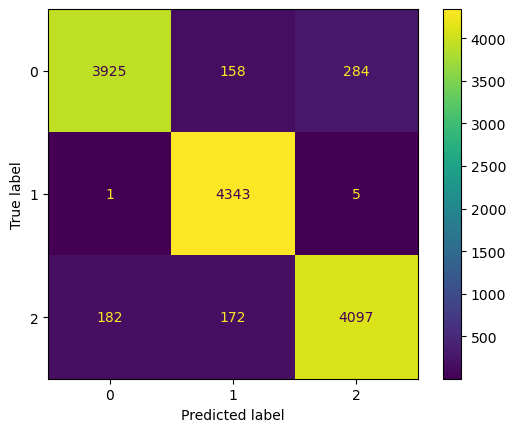

####################
hidden size:  [352, 396, 386, 119, 228]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=352, bias=True)
    (1): ReLU()
    (2): Linear(in_features=352, out_features=396, bias=True)
    (3): ReLU()
    (4): Linear(in_features=396, out_features=386, bias=True)
    (5): ReLU()
    (6): Linear(in_features=386, out_features=119, bias=True)
    (7): ReLU()
    (8): Linear(in_features=119, out_features=228, bias=True)
    (9): ReLU()
    (10): Linear(in_features=228, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.095163  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.fl

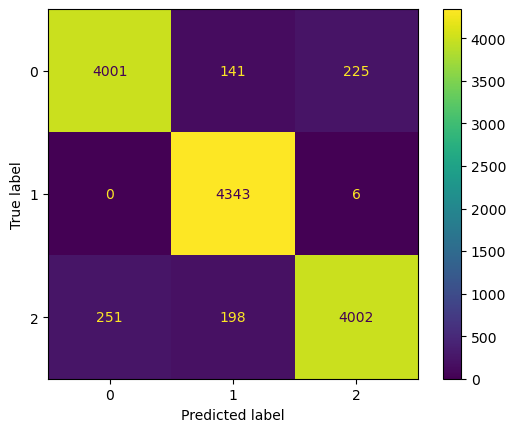

####################
hidden size:  [352, 396, 386, 119, 228]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=352, bias=True)
    (1): ReLU()
    (2): Linear(in_features=352, out_features=396, bias=True)
    (3): ReLU()
    (4): Linear(in_features=396, out_features=386, bias=True)
    (5): ReLU()
    (6): Linear(in_features=386, out_features=119, bias=True)
    (7): ReLU()
    (8): Linear(in_features=119, out_features=228, bias=True)
    (9): ReLU()
    (10): Linear(in_features=228, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.100359  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.flo

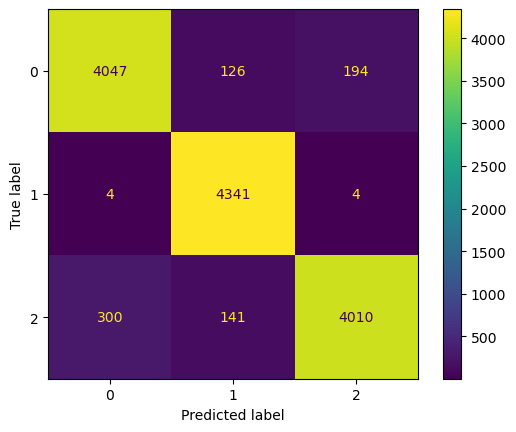

####################
hidden size:  [352, 396, 386, 119, 228]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=352, bias=True)
    (1): ReLU()
    (2): Linear(in_features=352, out_features=396, bias=True)
    (3): ReLU()
    (4): Linear(in_features=396, out_features=386, bias=True)
    (5): ReLU()
    (6): Linear(in_features=386, out_features=119, bias=True)
    (7): ReLU()
    (8): Linear(in_features=119, out_features=228, bias=True)
    (9): ReLU()
    (10): Linear(in_features=228, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.108455  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.floa

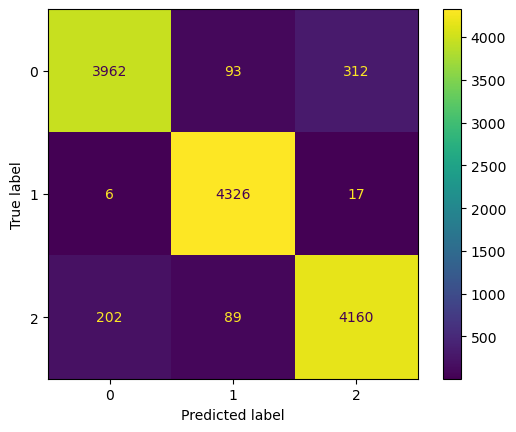

####################
hidden size:  [226]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=226, bias=True)
    (1): ReLU()
    (2): Linear(in_features=226, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.112552  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
tor

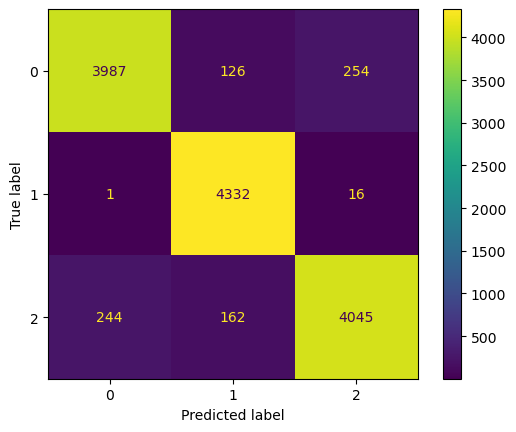

####################
hidden size:  [226]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=226, bias=True)
    (1): ReLU()
    (2): Linear(in_features=226, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.101155  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torc

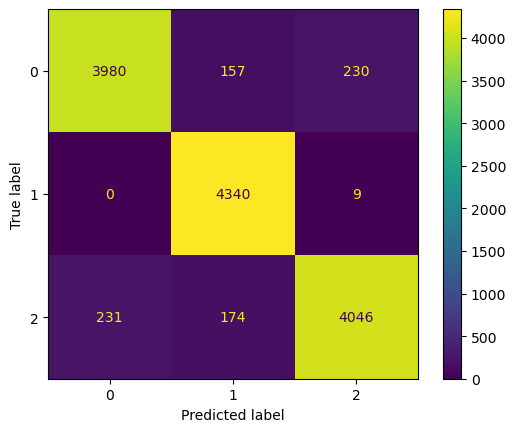

####################
hidden size:  [226]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=226, bias=True)
    (1): ReLU()
    (2): Linear(in_features=226, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.102085  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch

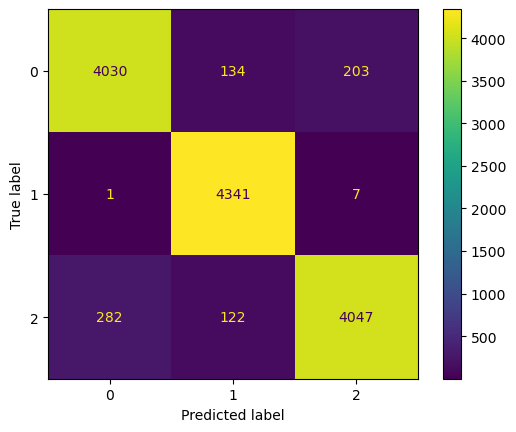

####################
hidden size:  [123, 297]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=123, bias=True)
    (1): ReLU()
    (2): Linear(in_features=123, out_features=297, bias=True)
    (3): ReLU()
    (4): Linear(in_features=297, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.095906  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int6

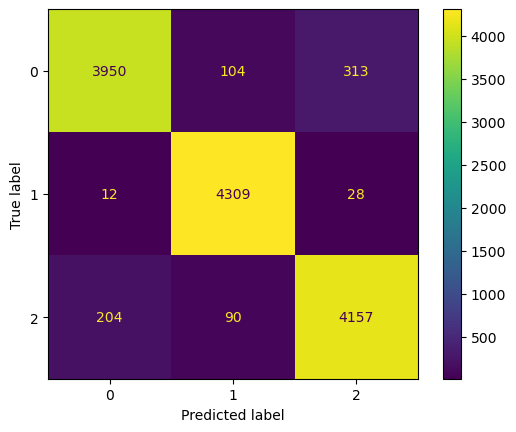

####################
hidden size:  [123, 297]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=123, bias=True)
    (1): ReLU()
    (2): Linear(in_features=123, out_features=297, bias=True)
    (3): ReLU()
    (4): Linear(in_features=297, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.114126  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

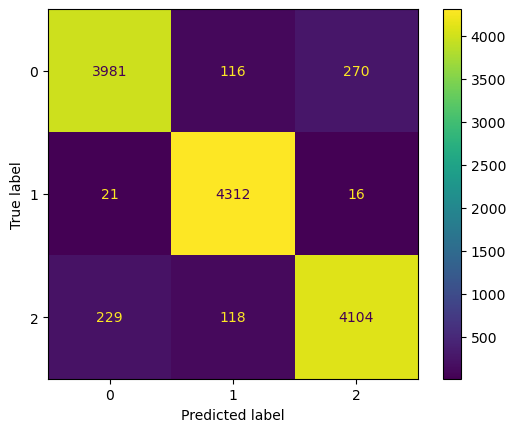

####################
hidden size:  [123, 297]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=123, bias=True)
    (1): ReLU()
    (2): Linear(in_features=123, out_features=297, bias=True)
    (3): ReLU()
    (4): Linear(in_features=297, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.115350  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


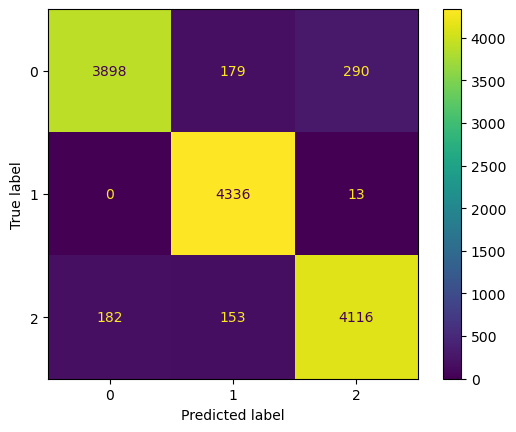

####################
####################
Fold 5
hidden size:  [280, 423]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.111615  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.in

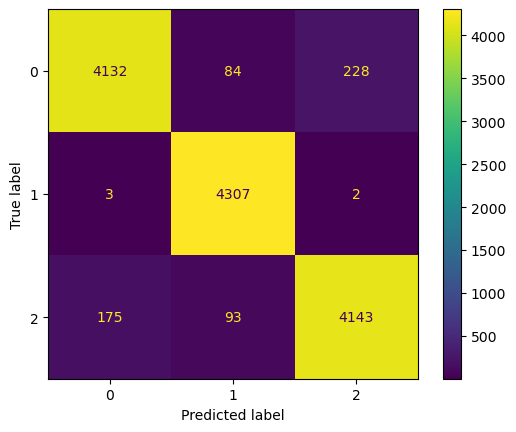

####################
hidden size:  [280, 423]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.120776  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64

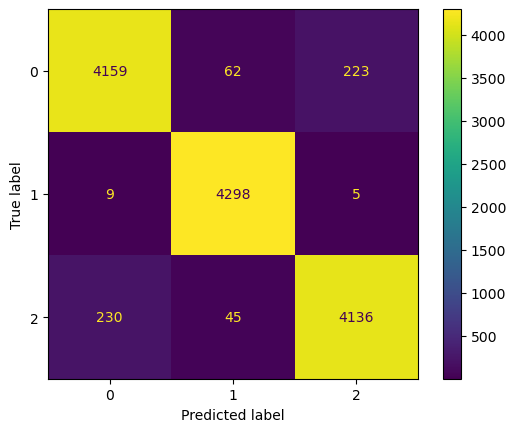

####################
hidden size:  [280, 423]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=423, bias=True)
    (3): ReLU()
    (4): Linear(in_features=423, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.108768  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64


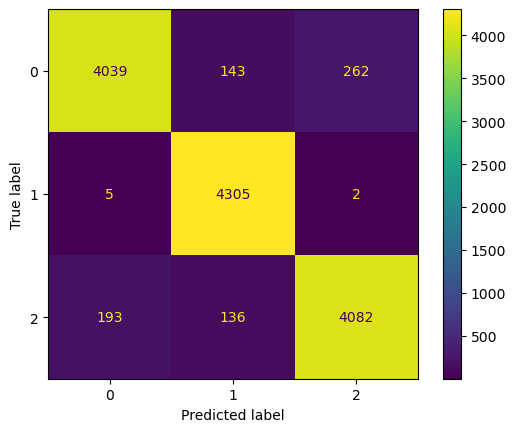

####################
hidden size:  [114]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.092049  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
tor

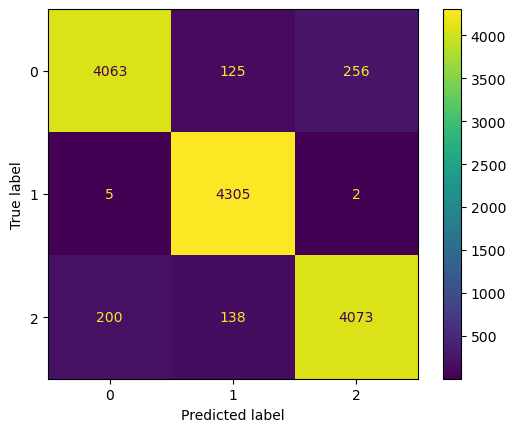

####################
hidden size:  [114]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.121778  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torc

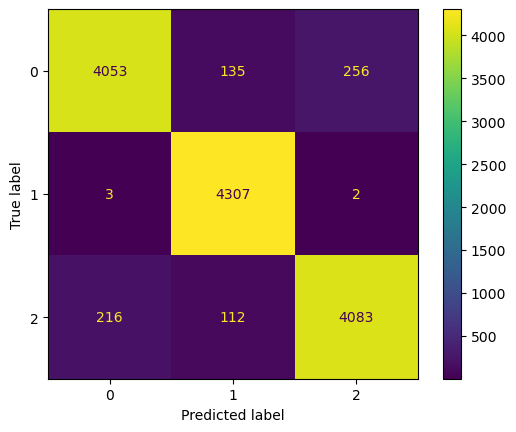

####################
hidden size:  [114]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.092348  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch

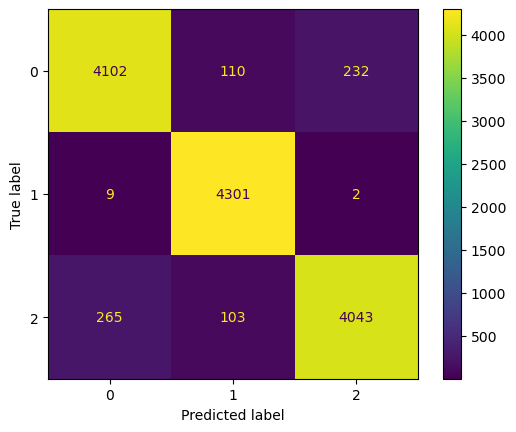

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.0001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.118743  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32


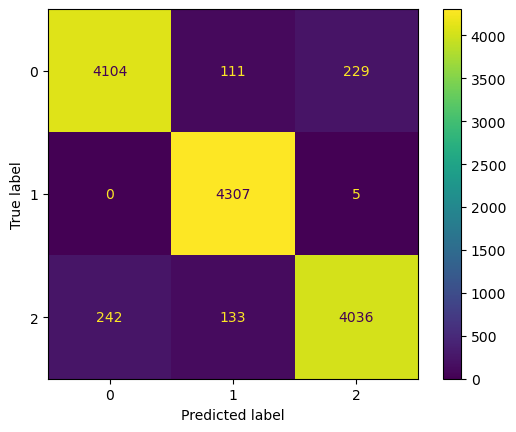

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.001
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.097233  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
t

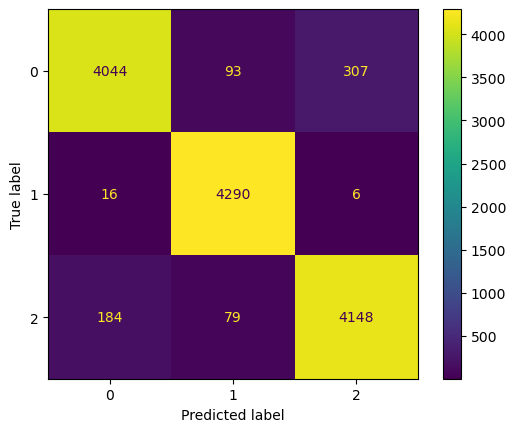

####################
hidden size:  [343, 198, 470, 533]
learning rate:  0.01
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=343, bias=True)
    (1): ReLU()
    (2): Linear(in_features=343, out_features=198, bias=True)
    (3): ReLU()
    (4): Linear(in_features=198, out_features=470, bias=True)
    (5): ReLU()
    (6): Linear(in_features=470, out_features=533, bias=True)
    (7): ReLU()
    (8): Linear(in_features=533, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
torch.float32
torch.int64
loss: 0.106123  [ 1024/52671]
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
torch.int64
torch.float32
to

KeyboardInterrupt: 

In [26]:
# Random search for DNN
param_dist = {"hidden_sizes": [[randint(64, 600).rvs() for i in range(randint(1, 6).rvs())] for j in range(10)], # hidden layer size
                "alpha": [0.0001, 0.001, 0.01], # L2 regularization
              }

print(param_dist["hidden_sizes"])

# rs = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10,
#                         cv=5, scoring='accuracy', random_state=42)


# K-fold cross validation for DNN
train_dataloader_list = []
val_dataloader_list = []

accuracy=[]
hidden=[]
learning_rate=[]


X_k_train, y_k_train, X_k_val, y_k_val = Kfold_split(X_train_scaled, y_train, Shuffle_state)
for i in range(len(X_k_train)):
    
    print("#"*20)
    print("Fold " + str(i+1))

    batch_size = 1024
    trainset_gpu = Data_tensor(X_k_train[i], y_k_train[i])
    valset_gpu = Data_tensor(X_k_val[i], y_k_val[i])
    train_dataloader = DataLoader(trainset_gpu, batch_size=batch_size, shuffle=True)
    validation_dataloader = DataLoader(valset_gpu, batch_size=batch_size, shuffle=False)
    

    for i in range(10):
        hidden_layer=param_dist['hidden_sizes'][i]
        for j in param_dist['alpha']:

            alpha=j
            print("hidden size: ", hidden_layer)
            print("learning rate: ", alpha)
            

            hidden.append(hidden_layer)
            learning_rate.append(alpha)
            # hidden_layer=[512,512]
            
            


            # model.hidden_sizes = hidden_layer
            optimizer_rs.lr = alpha
            model_rs = DNN_rs(X.shape[1], hidden_layer, 3).to(device)
            print(model_rs)

            epochs = 10
            for t in range(epochs):
                print(f"Epoch {t+1}\n-------------------------------")
                train(train_dataloader, model, loss_fn, optimizer)
                test(validation_dataloader, model, loss_fn)
            print("Done!")

            model.eval()
            pred = model(validation_dataloader.dataset[:][0]).detach().cpu().max(axis=1).indices.numpy()
            true = validation_dataloader.dataset[:][1].cpu().numpy()
            # Performance metrics
            Accuracy_LR = accuracy_score(true, pred)
            F1_LR = accuracy_score(true, pred)
            Precision_LR = accuracy_score(true, pred)
            Recall_LR = accuracy_score(true, pred)
        

            accuracy.append(Accuracy_LR)
            print("Accuracy: " + str(Accuracy_LR))
            print("F1 score: " + str(F1_LR))
            print("Recall score: " + str(Recall_LR))
            print("Precision score: " + str(Precision_LR))

            print("one value in validation set: ",sum(true==2))
            print("zero value in validation set: ",sum(true==1))
            print("negative one value in validation set: ",sum(true==0))
        
            cm_2c = confusion_matrix(true, pred)
            cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
            plt.show()
            print("#"*20)
  
print("#"*20)

print("The average accuracy is", np.mean(accuracy))
print("#"*20)


print("The best hidden layer size is", hidden[accuracy.index(max(accuracy))])
print("The best learning rate is", learning_rate[accuracy.index(max(accuracy))])

print("The best accuracy is", max(accuracy))
print("#"*20)







In [ ]:
# epochs = 5
# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     train(train_dataloader_list[1], model, loss_fn, optimizer)
#     test(val_dataloader_list[1], model, loss_fn)
# print("Done!")

In [ ]:
X_k_train, y_k_train, X_k_val, y_k_val = Kfold_split(X_train_scaled, y_train, Shuffle_state)

epochs = 5
for j in range(len(train_dataloader_list)):
    print("#"*20)
    print("K-fold: " + str(j+1))
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader_list[j], model, loss_fn, optimizer)
        test(val_dataloader_list[j], model, loss_fn)
    print("Done!")
    model.eval()
    pred = model(test_dataloader.dataset[:][0]).detach().cpu().max(axis=1).indices.numpy()
    true = test_dataloader.dataset[:][1].cpu().numpy()
    #Performance metrics
    Accuracy_LR = accuracy_score(true, pred)
    F1_LR = accuracy_score(true, pred)
    Precision_LR = accuracy_score(true, pred)
    Recall_LR = accuracy_score(true, pred)
    print("Accuracy: " + str(Accuracy_LR))
    print("F1 score: " + str(F1_LR))
    print("Recall score: " + str(Recall_LR))
    print("Precision score: " + str(Precision_LR))
    cm_2c = confusion_matrix(true, pred)
    cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
    plt.show()
    print("#"*20)
        

In [ ]:
# epochs = 100
# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     t_cur = t % 5
#     train(train_dataloader_list[t_cur], model, loss_fn, optimizer)
#     test(val_dataloader_list[t_cur], model, loss_fn)
# print("Done!")

In [ ]:
model.eval()
pred = model(test_dataloader.dataset[:][0]).detach().cpu().max(axis=1).indices.numpy()
true = test_dataloader.dataset[:][1].cpu().numpy()

In [ ]:
#Performance metrics
Accuracy_LR = accuracy_score(true, pred)
F1_LR = accuracy_score(true, pred)
Precision_LR = accuracy_score(true, pred)
Recall_LR = accuracy_score(true, pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.8392960184650894
F1 score: 0.8392960184650894
Recall score: 0.8392960184650894
Precision score: 0.8392960184650894


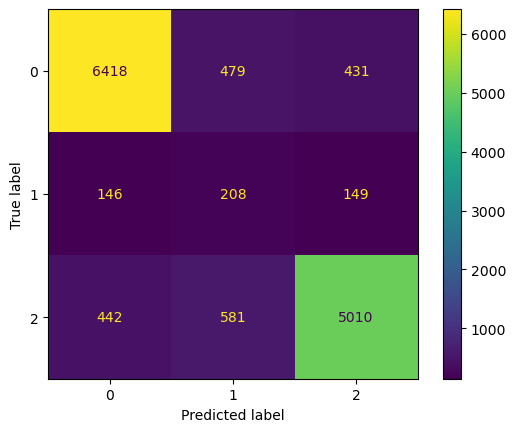

In [ ]:
#Confusion Matrix
cm_2c = confusion_matrix(true, pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()

In [ ]:
print(sum(y_test==1))
print(sum(y_test==-1))
print(sum(y_test==0))


6033
7328
503


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.datasets import load_digits
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# digits = load_digits()
# X, y = digits.data, digits.target

# # 定义DNN模型
# class DNN(nn.Module):
#     def __init__(self, input_size, hidden_sizes, output_size):
#         super(DNN, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_sizes[0])
#         self.hidden_layers = nn.ModuleList([nn.Linear(hidden_sizes[i], hidden_sizes[i+1]) for i in range(len(hidden_sizes)-1)])
#         self.fc_out = nn.Linear(hidden_sizes[-1], output_size)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         out = self.fc1(x)
#         out = self.relu(out)
#         for layer in self.hidden_layers:
#             out = layer(out)
#             out = self.relu(out)
#         out = self.fc_out(out)
#         return out

# # 定义参数空间
# param_dist = {"hidden_sizes": [randint(50, 200) for i in range(1, 6)],
#               "learning_rate": [0.001, 0.01, 0.1],
#               "batch_size": randint(16, 128)}

# # 创建随机搜索对象
# input_size = X.shape[1]
# output_size = len(set(y))
# dnn = DNN(input_size, hidden_sizes=[100], output_size=output_size)
# optimizer = optim.Adam(dnn.parameters())
# criterion = nn.CrossEntropyLoss()
# rs = RandomizedSearchCV(dnn, param_distributions=param_dist, n_iter=10,
#                         cv=5, scoring='accuracy', random_state=42)

# # 进行随机搜索
# for i, (train_idx, test_idx) in enumerate(rs.cv.split(X, y)):
#     X_train, y_train = torch.tensor(X[train_idx], dtype=torch.float32), torch.tensor(y[train_idx], dtype=torch.long)
#     X_test, y_test = torch.tensor(X[test_idx], dtype=torch.float32), torch.tensor(y[test_idx], dtype=torch.long)

#     # 设置超参数
#     params = rs.cv_results_['params'][i]
#     dnn.hidden_sizes = [params['hidden_sizes'] for i in range(1, 6)]
#     optimizer.lr = params['learning_rate']
#     batch_size = params['batch_size']

#     # 训练模型
#     train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train),
#                                                batch_size=batch_size, shuffle=True)
#     for epoch in range(10):
#         for batch_idx, (data, target) in enumerate(train_loader):
#             optimizer.zero_grad()
#             output = dnn(data)
#             loss = criterion(output, target)
#             loss.backward()
#             optimizer.step()

#     # 在测试集上评估模型
#     y_pred = dnn(X_test).argmax(dim=1)
#     accuracy = (y_pred == y_test).float().mean().item()
#     rs.cv_results_['split%d_test_score' % i] = accuracy

# # 打印最优的超参数组合和对应的得分
# print("Best parameters:", rs.best_params_)
# print("Best score:", rs.best_score_)

## 4. Model Evaluation